##SPOTIFY RECOMMENDATION SYSTEM
In the digital era, music streaming services have revolutionized how we discover and enjoy music, with Spotify leading the charge through its advanced recommendation system. By analyzing the songs and artists users frequently listen to, Spotify's algorithm identifies patterns and similarities, allowing it to curate personalized playlists that align with individual tastes. The success of this approach lies in the ability to cluster comparable features of songs, thereby comprehending the auditory properties that define different tracks.

This project aims to develop an automated music recommendation system inspired by Spotify's methodology, utilizing a specific dataset of user listening habits and song characteristics. By extracting key auditory features such as tempo, rhythm, and melody, and applying clustering algorithms, the project will group songs with similar attributes. This will enable the recommendation algorithm to suggest new tracks that resonate with users' existing preferences. Through continuous evaluation and refinement, the goal is to create a robust system that enhances the music discovery experience, demonstrating the potential of machine learning in the realm of personalized entertainment.

##Objective
The primary objective of this project is to develop an automated music recommendation system that leverages advanced machine learning techniques to provide personalized music suggestions, inspired by Spotify's successful algorithm. By utilizing a comprehensive dataset containing various attributes of Spotify tracks, including track details, album information, playlist context, and extensive audio features, the project aims to identify user preferences, cluster similar tracks, and enhance music discovery. Through the extraction and analysis of these features, the project will create a recommendation algorithm that suggests new tracks resonating with users' existing tastes. Continuous evaluation and refinement will ensure the system's accuracy and user satisfaction, ultimately demonstrating the potential of machine learning and data analysis in transforming music discovery and interaction.

##Dataset
The dataset utilized for this project is a comprehensive collection of Spotify tracks, meticulously curated to facilitate the development of an automated music recommendation system. It includes essential attributes such as track ID, name, artist, and popularity, providing fundamental details about each song. Additionally, it offers extensive album information, including album ID, name, and release date, which aids in contextual analysis. The dataset also incorporates playlist-related data, such as playlist name, ID, genre, and subgenre, reflecting user-curated collections and preferences. Crucial audio features like danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and duration are also included, enabling a thorough analysis of the auditory properties of each track. These features collectively support the development of a sophisticated recommendation algorithm by allowing for the clustering of songs based on their similarities, ultimately enhancing the music discovery experience for users.

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from scipy import stats
from scipy.stats import f_oneway
from scipy import special
import seaborn as sns
from os.path import join
from os import listdir
import math
spotify_data = pd.read_csv(r"/content/spotify dataset.csv")
spotify_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [315]:
spotify_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [316]:
spotify_data.tail()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432
32832,29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-4.571,0,0.0385,0.000133,0.341000,0.7420,0.0894,127.984,337500


In [317]:
spotify_data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [318]:
spotify_data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [319]:
spotify_data.shape

(32833, 23)

In [320]:
stats.describe(spotify_data["track_popularity"][1:])

DescribeResult(nobs=32832, minmax=(0, 100), mean=42.47636452241716, variance=624.2061362392067, skewness=-0.23325470040675164, kurtosis=-0.9328131075756807)

In [321]:
spotify_data.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

DATA VISUALIZATION

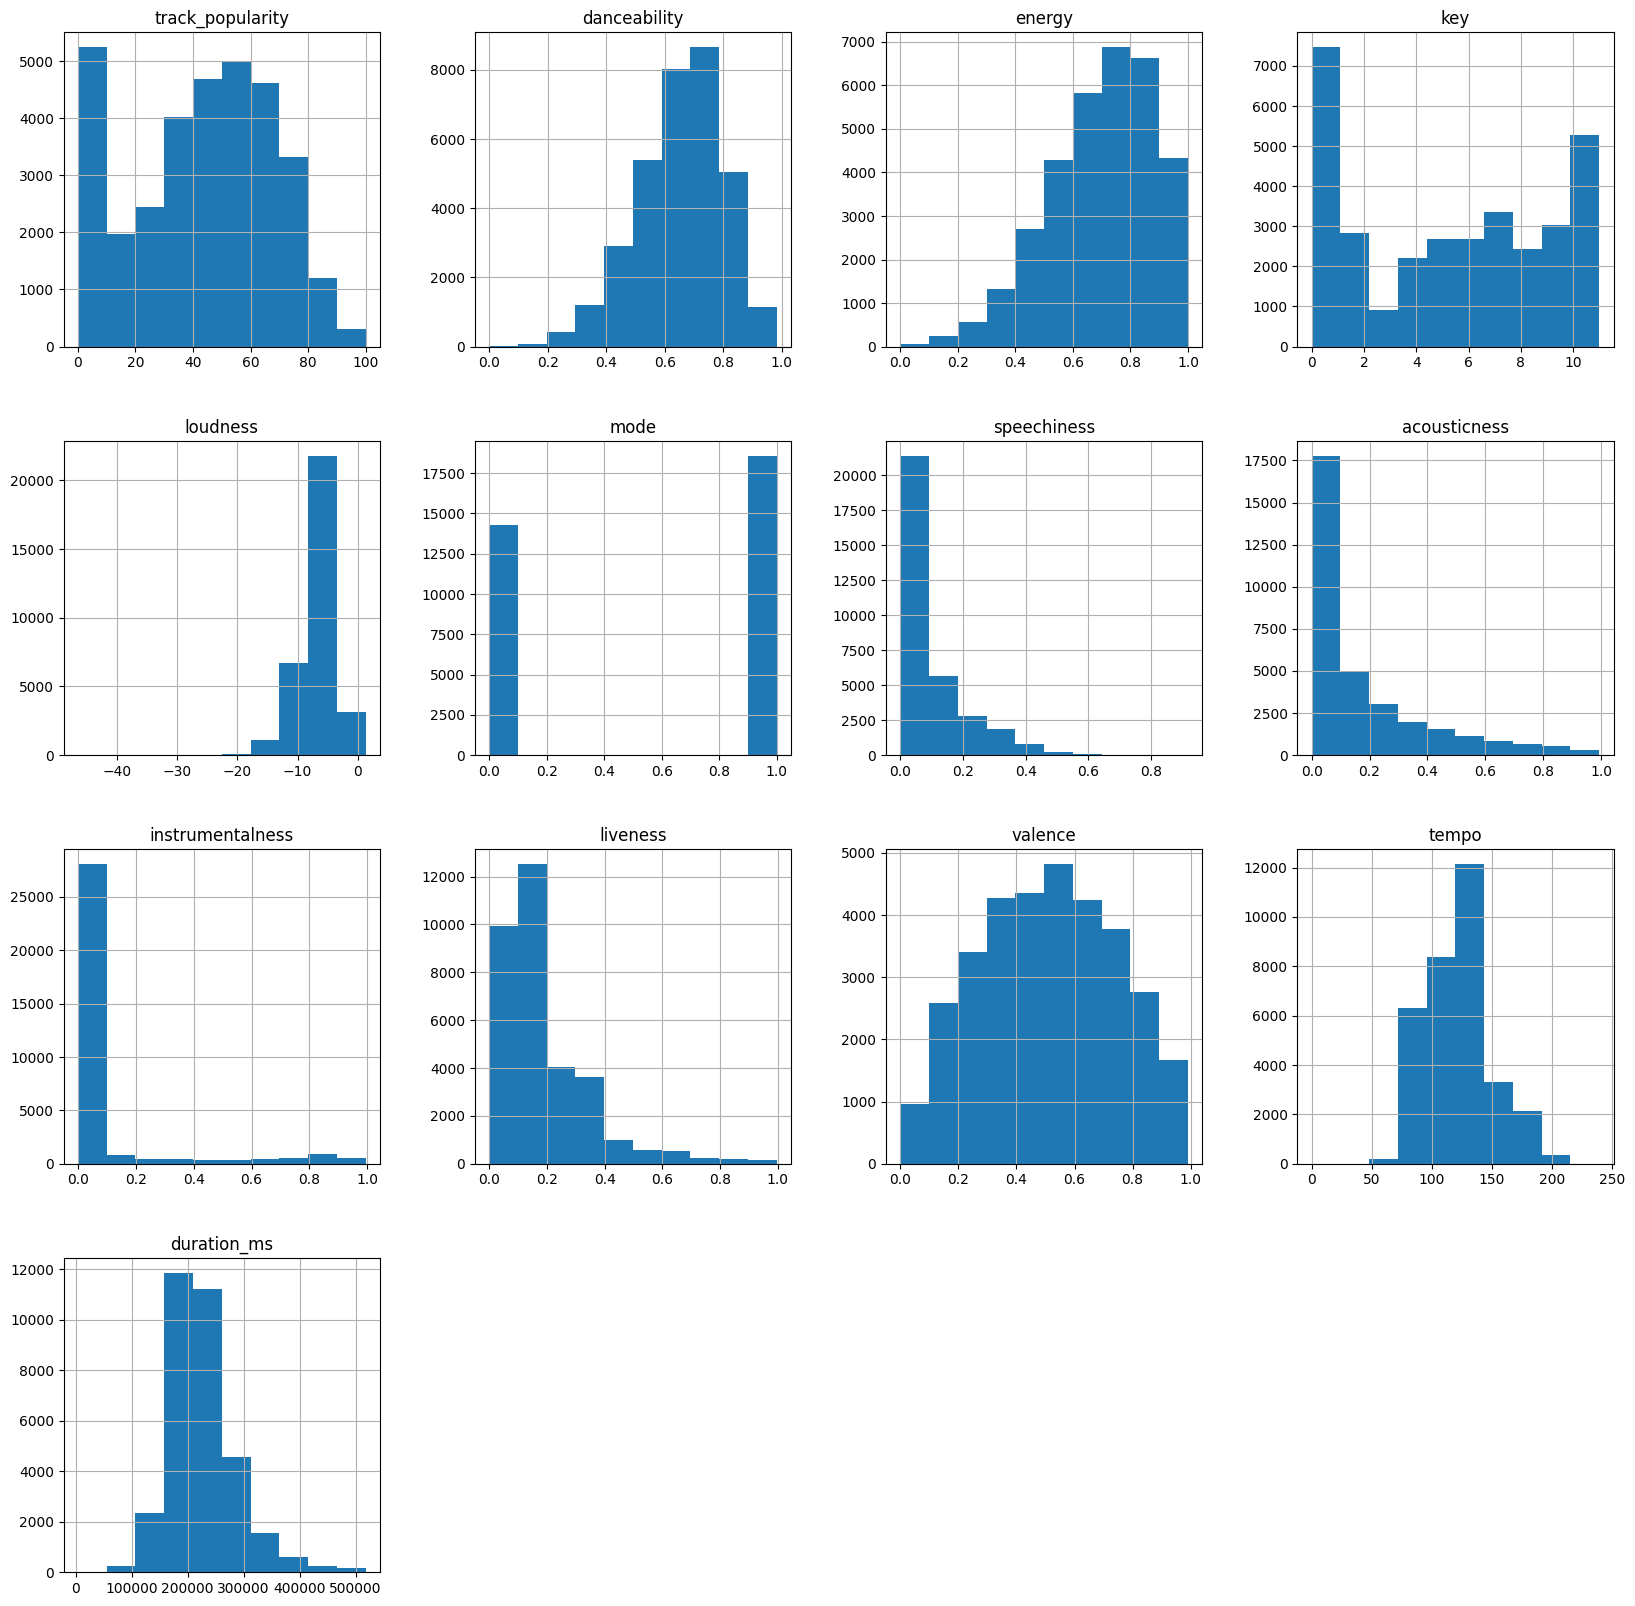

In [322]:
spotify_data.hist(figsize=(20,20))
plt.show()

In [323]:
spotify_data.isna().sum()/spotify_data.shape[0]#showing nan distirbution in data

track_id                    0.000000
track_name                  0.000152
track_artist                0.000152
track_popularity            0.000000
track_album_id              0.000000
track_album_name            0.000152
track_album_release_date    0.000000
playlist_name               0.000000
playlist_id                 0.000000
playlist_genre              0.000000
playlist_subgenre           0.000000
danceability                0.000000
energy                      0.000000
key                         0.000000
loudness                    0.000000
mode                        0.000000
speechiness                 0.000000
acousticness                0.000000
instrumentalness            0.000000
liveness                    0.000000
valence                     0.000000
tempo                       0.000000
duration_ms                 0.000000
dtype: float64

In [324]:
spotify_data = spotify_data.drop_duplicates()#we are duplicating values if available
spotify_data.count()

track_id                    32833
track_name                  32828
track_artist                32828
track_popularity            32833
track_album_id              32833
track_album_name            32828
track_album_release_date    32833
playlist_name               32833
playlist_id                 32833
playlist_genre              32833
playlist_subgenre           32833
danceability                32833
energy                      32833
key                         32833
loudness                    32833
mode                        32833
speechiness                 32833
acousticness                32833
instrumentalness            32833
liveness                    32833
valence                     32833
tempo                       32833
duration_ms                 32833
dtype: int64

In [325]:
print(spotify_data.isnull().sum())

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [326]:
spotify_data = spotify_data.dropna()
spotify_data.count()

track_id                    32828
track_name                  32828
track_artist                32828
track_popularity            32828
track_album_id              32828
track_album_name            32828
track_album_release_date    32828
playlist_name               32828
playlist_id                 32828
playlist_genre              32828
playlist_subgenre           32828
danceability                32828
energy                      32828
key                         32828
loudness                    32828
mode                        32828
speechiness                 32828
acousticness                32828
instrumentalness            32828
liveness                    32828
valence                     32828
tempo                       32828
duration_ms                 32828
dtype: int64

Data is clean does not contain any nan values,duplicates and null values.


<Axes: xlabel='danceability'>

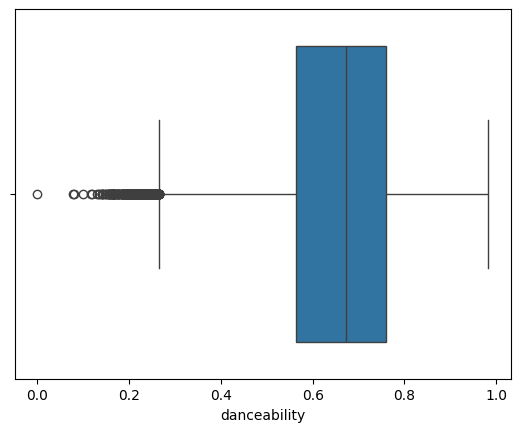

In [327]:
sns.boxplot(x=spotify_data["danceability"])

<Axes: xlabel='acousticness'>

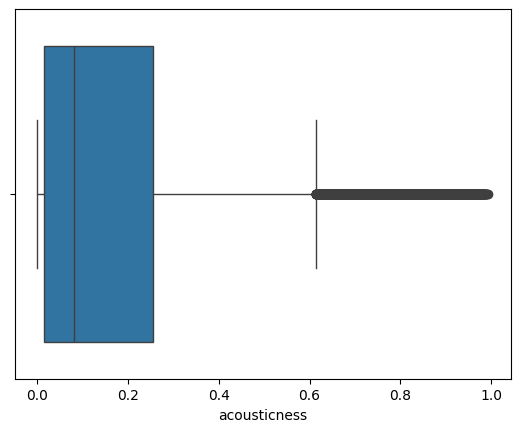

In [328]:
sns.boxplot(x=spotify_data["acousticness"])

<Axes: xlabel='energy'>

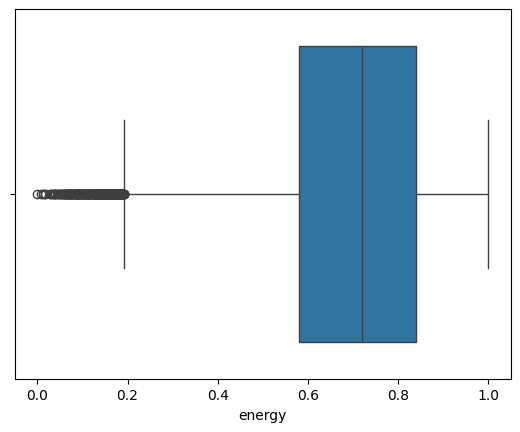

In [329]:
sns.boxplot(x=spotify_data["energy"])

<Axes: xlabel='loudness'>

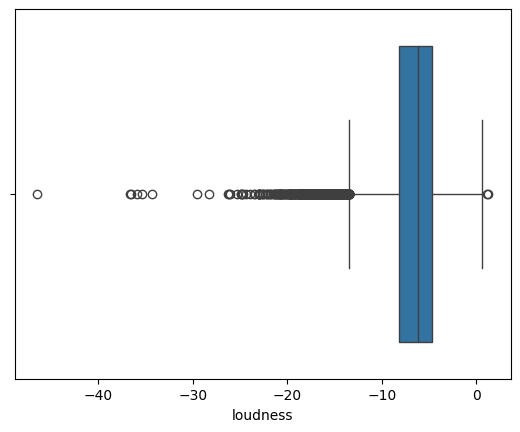

In [330]:
sns.boxplot(x=spotify_data["loudness"])

<Axes: xlabel='instrumentalness'>

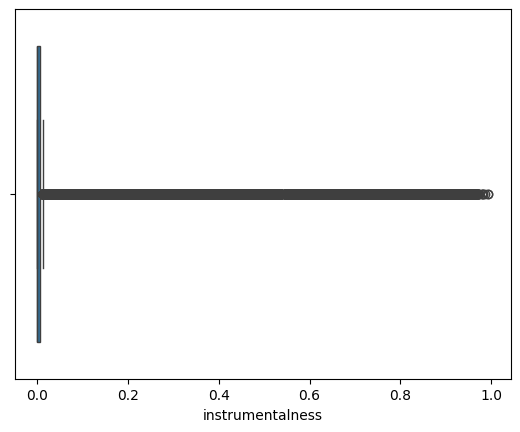

In [331]:
sns.boxplot(x=spotify_data["instrumentalness"])

<Axes: xlabel='liveness'>

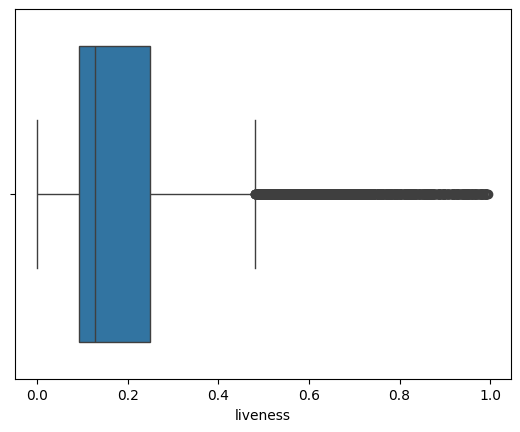

In [332]:
sns.boxplot(x=spotify_data["liveness"])

<Axes: xlabel='tempo'>

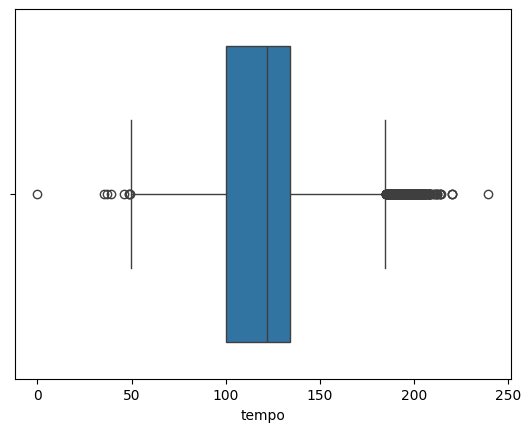

In [333]:
sns.boxplot(x=spotify_data["tempo"])

<Axes: xlabel='valence'>

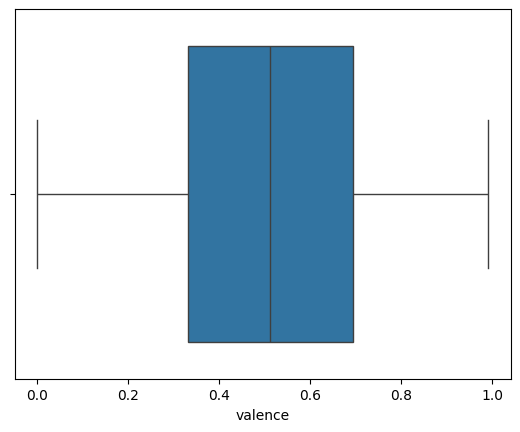

In [334]:
sns.boxplot(x=spotify_data["valence"])

<Axes: xlabel='speechiness'>

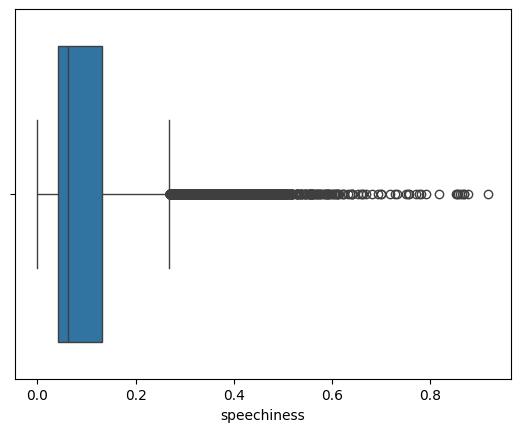

In [335]:
sns.boxplot(x=spotify_data["speechiness"])

<Axes: xlabel='duration_ms'>

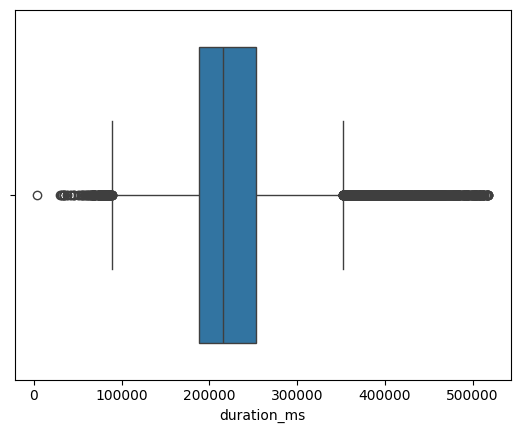

In [336]:
sns.boxplot(x=spotify_data["duration_ms"])

<Axes: xlabel='track_popularity'>

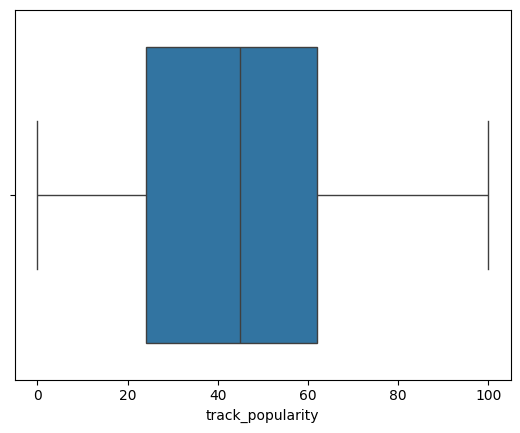

In [337]:
sns.boxplot(x=spotify_data["track_popularity"])

<Axes: xlabel='key'>

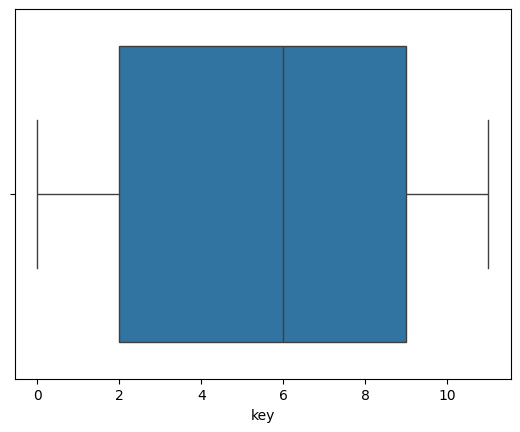

In [338]:

sns.boxplot(x=spotify_data["key"])

In [339]:
print(spotify_data["track_album_release_date"])

0        2019-06-14
1        2019-12-13
2        2019-07-05
3        2019-07-19
4        2019-03-05
            ...    
32828    2014-04-28
32829    2013-03-08
32830    2014-04-21
32831    2014-01-01
32832    2014-03-03
Name: track_album_release_date, Length: 32828, dtype: object


DATA ANALYSIS


In [340]:
summerspotify_data1_pop = spotify_data.loc[spotify_data['track_album_release_date'].str[5:7] == "06"]
summerspotify_data2_pop = spotify_data.loc[spotify_data['track_album_release_date'].str[5:7] == "07"]
summerspotify_data3_pop = spotify_data.loc[spotify_data['track_album_release_date'].str[5:7] == "08"]
summerspotify_dataList_pop = [summerspotify_data1_pop, summerspotify_data2_pop, summerspotify_data3_pop]
summerspotify_data_pop = pd.concat(summerspotify_dataList_pop)
summerspotify_data_pop = summerspotify_data_pop[summerspotify_data_pop['playlist_genre'].apply(lambda x: 'pop' in x)]
summerspotify_data_pop.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
8,7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-3.562,1,0.0565,0.0249,0.000004,0.6370,0.366,127.015,193187
9,1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,2,-4.552,1,0.0320,0.0567,0.000000,0.0919,0.590,124.957,253040
10,3eFJI470ALf1EYjywPRsJy,Cross Me (feat. Chance the Rapper & PnB Rock) ...,Ed Sheeran,58,49bXZtlI5kQSqQMSCnSaWO,Cross Me (feat. Chance the Rapper & PnB Rock) ...,2019-06-21,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-6.500,1,0.1810,0.1460,0.000005,0.1240,0.752,121.984,207894
25,5dy3WUywjZcalTno1io8TQ,Hold Me While You Wait - Steve Void Remix,Lewis Capaldi,63,1LTVUVJQ9wNArrbm02ZOVL,Hold Me While You Wait (Steve Void Remix),2019-06-21,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-7.037,1,0.0434,0.1040,0.000000,0.3300,0.468,124.933,172800


In [341]:
fallspotify_data1_pop = spotify_data.loc[spotify_data['track_album_release_date'].str[5: 7] == "09"]
fallspotify_data2_pop = spotify_data.loc[spotify_data['track_album_release_date'].str[5: 7] == "10"]
fallspotify_data3_pop = spotify_data.loc[spotify_data['track_album_release_date'].str[5: 7] == "11"]
fallspotify_dataList_pop = [fallspotify_data1_pop, fallspotify_data2_pop, fallspotify_data3_pop]
fallspotify_data_pop = pd.concat(fallspotify_dataList_pop)
fallspotify_data_pop = fallspotify_data_pop[fallspotify_data_pop['playlist_genre'].apply(lambda x: 'pop' in x)]
fallspotify_data_pop.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
33,7AasLZ4TYgh7dbJXZxcZVE,Torn - KREAM Remix,Ava Max,60,6gKLNSKPll9DAG5xiygMxD,Torn (KREAM Remix),2019-09-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,-5.060,1,0.0976,0.00141,0.004670,0.2410,0.727,125.032,169935
49,08rBIlTMXlF5uEHobZglxv,Million Pieces - M-22 Remix,Bastille,53,4lzn3ikjb2HPZM6U6Y1IRL,Million Pieces (M-22 Remix),2019-09-27,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,4,-3.318,0,0.0585,0.08320,0.008300,0.1090,0.479,123.951,166237
62,1nwoWaqzB30bD4IPqRNuex,With You - Dexter Remix,Kaskade,51,5cHgBxHHpJLjMWGBBiJEVJ,With You - The Remixes,2019-09-12,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-6.918,0,0.1320,0.11900,0.000006,0.2240,0.470,126.092,196613
64,6AZ21kPj2a0INgf3uCviVu,Beautiful (feat. Camila Cabello) - Bazzi vs. E...,Bazzi vs.,56,6KGnQuHVrsfblNq0ekXp3y,Beautiful (feat. Camila Cabello) [Bazzi vs. ED...,2018-09-28,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,2,-4.154,1,0.0944,0.06110,0.000018,0.2380,0.453,121.975,187869
68,27F9FlipD657qYRQT3qxFm,Treehouse - R3HAB Remix,James Arthur,56,6T3Bfp49DNsclv7kq9eqP2,Treehouse (R3HAB Remix),2019-09-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-4.504,1,0.1540,0.00515,0.000000,0.0545,0.289,88.013,192653


In [342]:
summerspotify_data1_rap = spotify_data.loc[spotify_data['track_album_release_date'].str[5:7] == "06"]
summerspotify_data2_rap = spotify_data.loc[spotify_data['track_album_release_date'].str[5:7] == "07"]
summerspotify_data3_rap = spotify_data.loc[spotify_data['track_album_release_date'].str[5:7] == "08"]
summerspotify_dataList_rap= [summerspotify_data1_rap, summerspotify_data2_rap, summerspotify_data3_rap]
summerspotify_data_rap= pd.concat(summerspotify_dataList_rap)
summerspotify_data_rap = summerspotify_data_rap[summerspotify_data_rap['playlist_genre'].apply(lambda x: 'rap' in x)]
summerspotify_data_rap.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
5547,4E08gEca6avoGx5SS4MM6T,G Walk (with Chris Brown),Lil Mosey,52,3u1dsCyCvCxk0kH1whn1oZ,G Walk (with Chris Brown),2019-06-07,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,0,-5.359,1,0.1010,0.275,0.000,0.126,0.720,89.969,141333
5576,5VmL8CrjM82tIGWwum8Cbo,Venice,Gyvus,62,380nnXWEOGoB4ILSl7mijj,Venice,2018-06-23,Jazz Vibes,37i9dQZF1DX0SM0LYsmbMT,rap,...,8,-7.351,1,0.1390,0.333,0.880,0.148,0.801,95.011,156632
5660,3m3IcXx0tjp9tgkisn60YE,bouquet of balloons,biosphere,54,07sS8e5gtXTt70It4bKe7M,Rekindle the Past,2018-06-03,Lush Lofi,37i9dQZF1DXc8kgYqQLMfH,rap,...,7,-15.436,1,0.0600,0.441,0.821,0.122,0.792,162.011,183704
5716,4OfB6dy0mjs56CYTlLI7Oe,Syrup,Dweeb,6,6vvOprheUb3xUjb5DjeojK,[Untitled] VI,2018-06-29,Lush Lofi,37i9dQZF1DXc8kgYqQLMfH,rap,...,0,-13.146,1,0.0441,0.754,0.938,0.107,0.223,86.998,66207
5719,5DaL1ihlNVFZ7qdiNds13f,Recollections,jrd.,47,3NwUVz7s27KaJxhwbPYnIf,Reflections,2018-06-02,Lush Lofi,37i9dQZF1DXc8kgYqQLMfH,rap,...,11,-15.162,1,0.4560,0.891,0.928,0.102,0.615,78.132,147716


In [343]:
fallspotify_data1_rap = spotify_data.loc[spotify_data['track_album_release_date'].str[5: 7] == "09"]
fallspotify_data2_rap = spotify_data.loc[spotify_data['track_album_release_date'].str[5: 7] == "10"]
fallspotify_data3_rap = spotify_data.loc[spotify_data['track_album_release_date'].str[5: 7] == "11"]
fallspotify_dataList_rap = [fallspotify_data1_rap, fallspotify_data2_rap, fallspotify_data3_rap]
fallspotify_data_rap = pd.concat(fallspotify_dataList_rap)
fallspotify_data_rap = fallspotify_data_rap[fallspotify_data_rap['playlist_genre'].apply(lambda x: 'rap' in x)]
fallspotify_data_rap.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
5514,6Ozh9Ok6h4Oi1wUSLtBseN,BOP,DaBaby,93,1NsTSXjVNE7XmZ8PmyW0wl,KIRK,2019-09-27,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,11,-3.909,1,0.3670,0.189000,0.000000,0.1290,0.836,126.770,159715
5519,2FvD20Z8aoWIePi7PoN8sG,TOES (feat. Lil Baby & Moneybagg Yo),DaBaby,86,1NsTSXjVNE7XmZ8PmyW0wl,KIRK,2019-09-27,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,8,-4.141,1,0.3410,0.079400,0.000006,0.0916,0.542,160.004,136366
5529,0fySG6A6qLE8IvDpayb5bM,VIBEZ,DaBaby,88,1NsTSXjVNE7XmZ8PmyW0wl,KIRK,2019-09-27,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,1,-2.708,0,0.3070,0.113000,0.000000,0.1070,0.777,154.187,144935
5554,6VYXuUz1nYMap8gtqeIrQB,I Think I Luv Her,Tyla Yaweh,77,6SLjG25W8rKuvSUExihz7g,I Think I Luv Her,2019-09-27,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,11,-6.238,1,0.2700,0.000456,0.000000,0.0621,0.836,84.001,160742
5588,74D5pms3OKB8xEem6KwLdY,Belém,DAO,61,7euwnYes5L8HOhZFg5hmFZ,Belém,2019-09-06,Jazz Vibes,37i9dQZF1DX0SM0LYsmbMT,rap,...,11,-10.602,0,0.0762,0.139000,0.867000,0.1010,0.304,99.960,125400


In [344]:
sumAcoMean_pop = summerspotify_data_pop['acousticness'].mean()
sumDanceMean_pop = summerspotify_data_pop['danceability'].mean()
sumDurMean_pop = summerspotify_data_pop['duration_ms'].mean()
sumEnergyMean_pop = summerspotify_data_pop['energy'].mean()
sumInstMean_pop = summerspotify_data_pop['instrumentalness'].mean()
sumLivMean_pop = summerspotify_data_pop['liveness'].mean()
sumLoudMean_pop = summerspotify_data_pop['loudness'].mean()
sumMajOccMean_pop = len(summerspotify_data_pop[summerspotify_data_pop['mode'] == 1])/len(summerspotify_data_pop)
sumPopMean_pop = summerspotify_data_pop['track_popularity'].mean()
sumSpeechMean_pop = summerspotify_data_pop['speechiness'].mean()
sumTempoMean_pop = summerspotify_data_pop['tempo'].mean()
sumValMean_pop = summerspotify_data_pop['valence'].mean()

fallAcoMean_pop = fallspotify_data_pop['acousticness'].mean()
fallDanceMean_pop = fallspotify_data_pop['danceability'].mean()
fallDurMean_pop = fallspotify_data_pop['duration_ms'].mean()
fallEnergyMean_pop = fallspotify_data_pop['energy'].mean()
fallInstMean_pop = fallspotify_data_pop['instrumentalness'].mean()
fallLivMean_pop = fallspotify_data_pop['liveness'].mean()
fallLoudMean_pop = fallspotify_data_pop['loudness'].mean()
fallMajOccMean_pop = len(fallspotify_data_pop[fallspotify_data_pop['mode'] == 1])/len(fallspotify_data_pop)
fallPopMean_pop = fallspotify_data_pop['track_popularity'].mean()
fallSpeechMean_pop = fallspotify_data_pop['speechiness'].mean()
fallTempoMean_pop = fallspotify_data_pop['tempo'].mean()
fallValMean_pop = fallspotify_data_pop['valence'].mean()

In [345]:
sumAcoMean_rap = summerspotify_data_rap['acousticness'].mean()
sumDanceMean_rap = summerspotify_data_rap['danceability'].mean()
sumDurMean_rap = summerspotify_data_rap['duration_ms'].mean()
sumEnergyMean_rap = summerspotify_data_rap['energy'].mean()
sumInstMean_rap = summerspotify_data_rap['instrumentalness'].mean()
sumLivMean_rap = summerspotify_data_rap['liveness'].mean()
sumLoudMean_rap = summerspotify_data_rap['loudness'].mean()
sumMajOccMean_rap = len(summerspotify_data_rap[summerspotify_data_rap['mode'] == 1])/len(summerspotify_data_rap)
sumPopMean_rap = summerspotify_data_rap['track_popularity'].mean()
sumSpeechMean_rap = summerspotify_data_rap['speechiness'].mean()
sumTempoMean_rap = summerspotify_data_rap['tempo'].mean()
sumValMean_rap = summerspotify_data_rap['valence'].mean()

fallAcoMean_rap = fallspotify_data_rap['acousticness'].mean()
fallDanceMean_rap = fallspotify_data_rap['danceability'].mean()
fallDurMean_rap = fallspotify_data_rap['duration_ms'].mean()
fallEnergyMean_rap = fallspotify_data_rap['energy'].mean()
fallInstMean_rap = fallspotify_data_rap['instrumentalness'].mean()
fallLivMean_rap = fallspotify_data_rap['liveness'].mean()
fallLoudMean_rap = fallspotify_data_rap['loudness'].mean()
fallMajOccMean_rap = len(fallspotify_data_rap[fallspotify_data_rap['mode'] == 1])/len(fallspotify_data_rap)
fallPopMean_rap = fallspotify_data_rap['track_popularity'].mean()
fallSpeechMean_rap = fallspotify_data_rap['speechiness'].mean()
fallTempoMean_rap = fallspotify_data_rap['tempo'].mean()
fallValMean_rap = fallspotify_data_rap['valence'].mean()

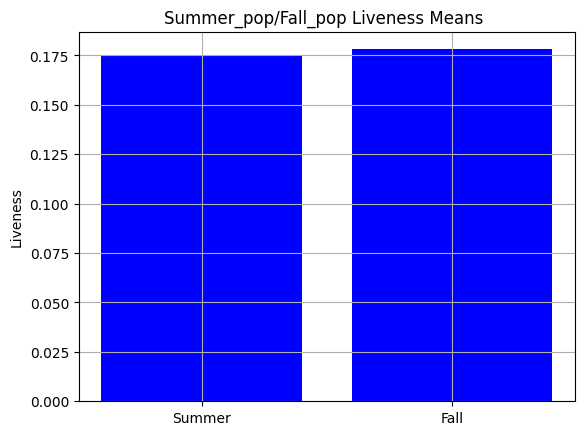

In [346]:
axLiv = plt.bar(["Summer", "Fall"], [sumLivMean_pop, fallLivMean_pop], color = 'blue')
plt.title("Summer_pop/Fall_pop Liveness Means ", fontdict=None, loc='center', pad=None)
plt.ylabel("Liveness")
plt.grid()

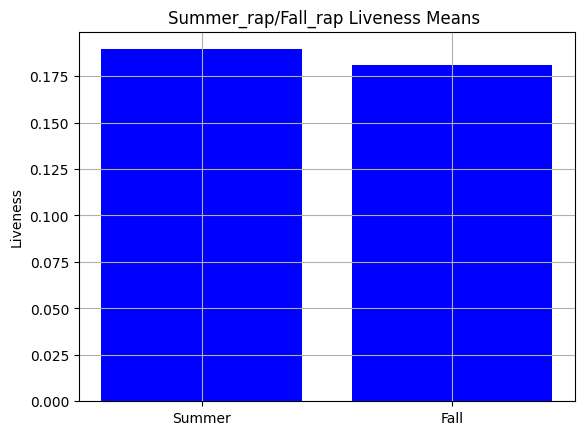

In [347]:
axLiv = plt.bar(["Summer", "Fall"], [sumLivMean_rap, fallLivMean_rap], color = 'blue')
plt.title("Summer_rap/Fall_rap Liveness Means ", fontdict=None, loc='center', pad=None)
plt.ylabel("Liveness")
plt.grid()

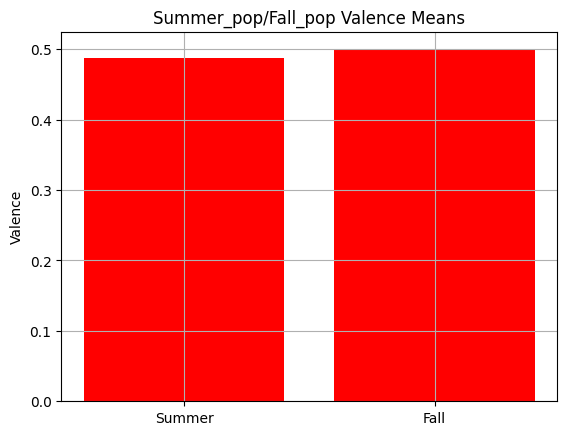

In [348]:
axVal = plt.bar(["Summer", "Fall"], [sumValMean_pop, fallValMean_pop], color = 'red')
plt.title("Summer_pop/Fall_pop Valence Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Valence")
plt.grid()

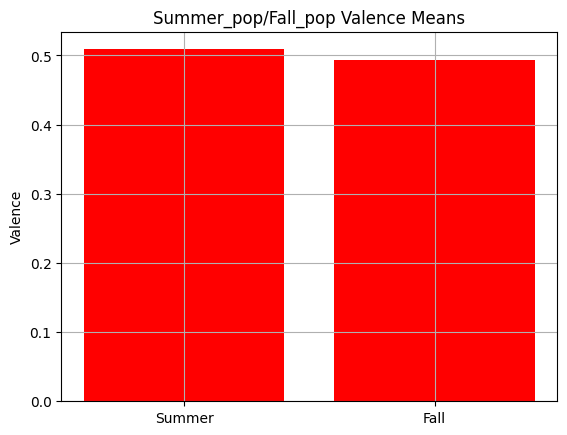

In [349]:
axVal = plt.bar(["Summer", "Fall"], [sumValMean_rap, fallValMean_rap], color = 'red')
plt.title("Summer_pop/Fall_pop Valence Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Valence")
plt.grid()

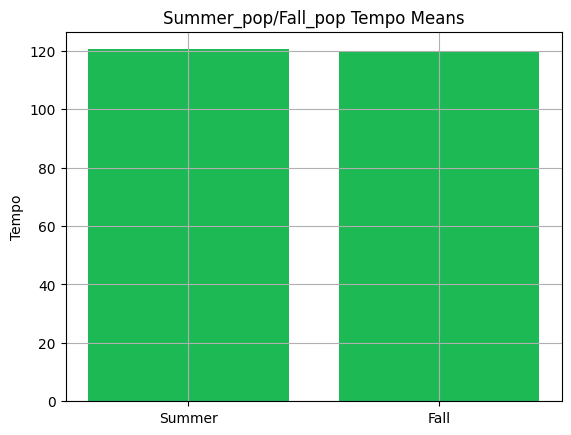

In [350]:
axTempo = plt.bar(["Summer", "Fall"], [sumTempoMean_pop, fallTempoMean_pop], color = '#1DB954')
plt.title("Summer_pop/Fall_pop Tempo Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Tempo")
plt.grid()

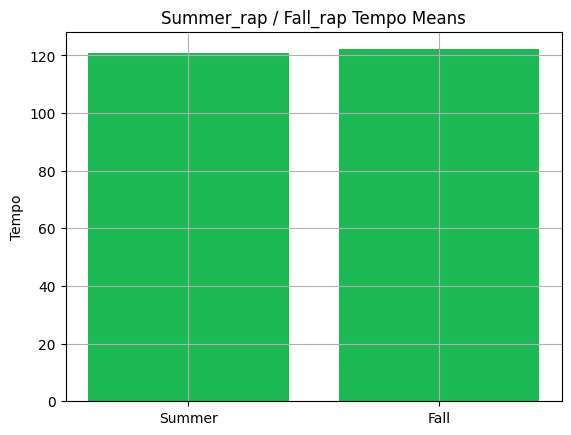

In [351]:
axTempo = plt.bar(["Summer", "Fall"], [sumTempoMean_rap, fallTempoMean_rap], color = '#1DB954')
plt.title("Summer_rap / Fall_rap Tempo Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Tempo")
plt.grid()

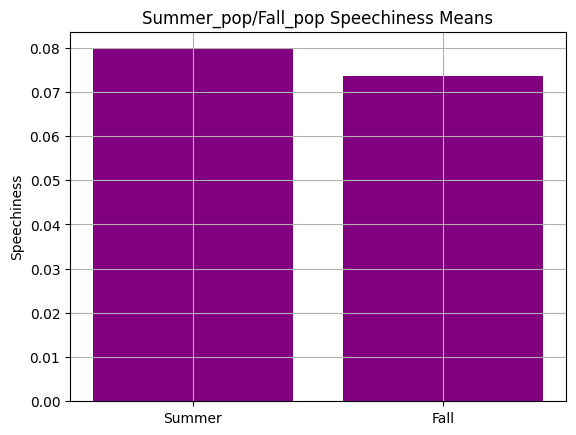

In [352]:

axSpeech= plt.bar(["Summer", "Fall"], [sumSpeechMean_pop, fallSpeechMean_pop], color = 'purple')
plt.title("Summer_pop/Fall_pop Speechiness Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Speechiness")
plt.grid()


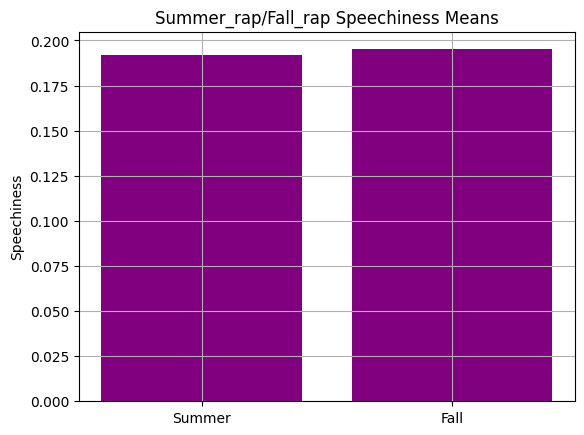

In [353]:

axSpeech= plt.bar(["Summer", "Fall"], [sumSpeechMean_rap, fallSpeechMean_rap], color = 'purple')
plt.title("Summer_rap/Fall_rap Speechiness Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Speechiness")
plt.grid()


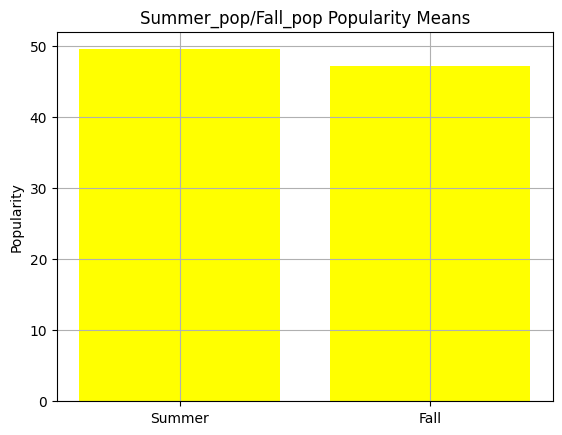

In [354]:
axPop = plt.bar(["Summer", "Fall"], [sumPopMean_pop, fallPopMean_pop], color = 'yellow')
plt.title("Summer_pop/Fall_pop Popularity Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Popularity")
plt.grid()

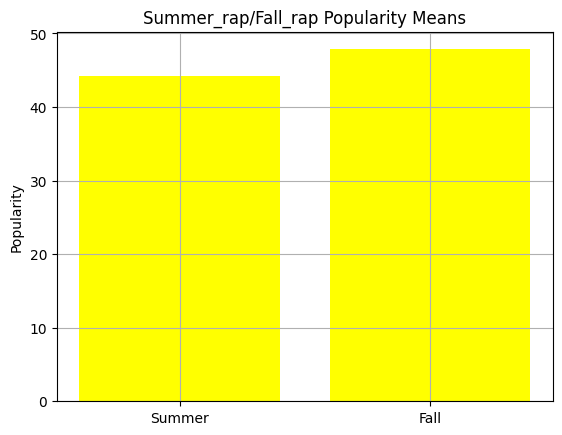

In [355]:
axPop = plt.bar(["Summer", "Fall"], [sumPopMean_rap, fallPopMean_rap], color = 'yellow')
plt.title("Summer_rap/Fall_rap Popularity Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Popularity")
plt.grid()

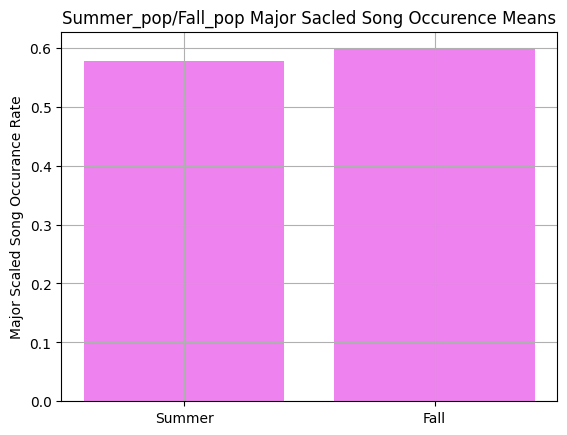

In [356]:

axMajOcc = plt.bar(["Summer", "Fall"], [sumMajOccMean_pop, fallMajOccMean_pop], color = 'violet')
plt.title("Summer_pop/Fall_pop Major Sacled Song Occurence Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Major Scaled Song Occurance Rate")
plt.grid()

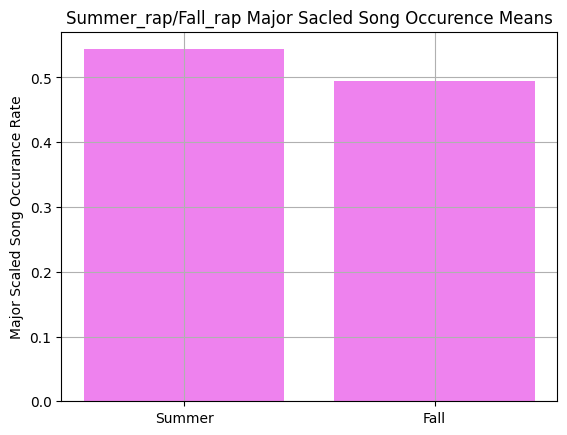

In [357]:

axMajOcc = plt.bar(["Summer", "Fall"], [sumMajOccMean_rap, fallMajOccMean_rap], color = 'violet')
plt.title("Summer_rap/Fall_rap Major Sacled Song Occurence Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Major Scaled Song Occurance Rate")
plt.grid()

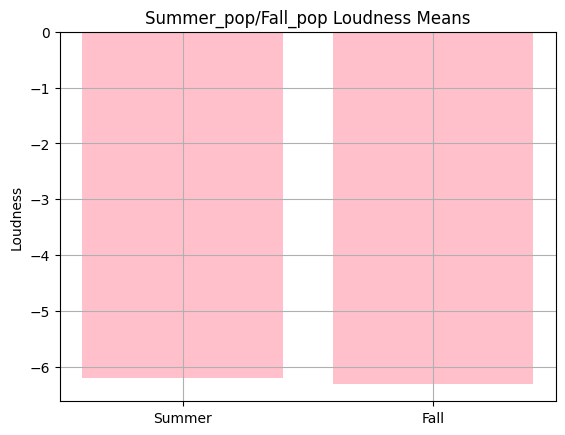

In [358]:
axLoud = plt.bar(["Summer", "Fall"], [sumLoudMean_pop, fallLoudMean_pop], color = 'pink')
plt.title("Summer_pop/Fall_pop Loudness Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Loudness")
plt.grid()

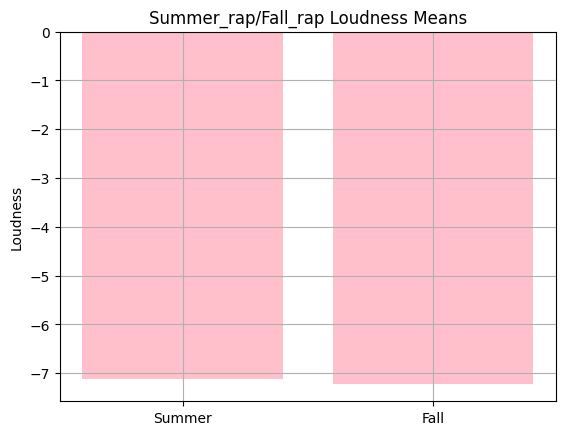

In [359]:
axLoud = plt.bar(["Summer", "Fall"], [sumLoudMean_rap, fallLoudMean_rap], color = 'pink')
plt.title("Summer_rap/Fall_rap Loudness Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Loudness")
plt.grid()

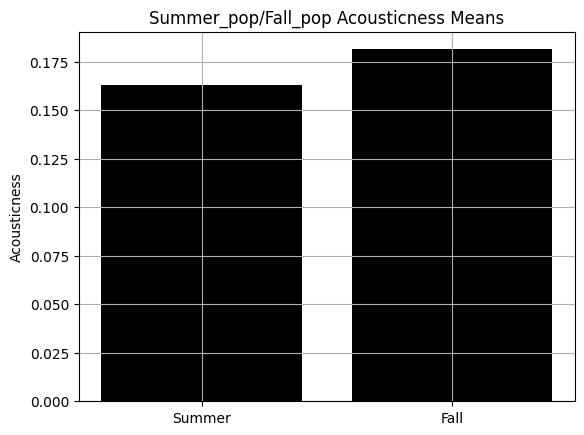

In [360]:
axAcousticness =  plt.bar(["Summer", "Fall"], [sumAcoMean_pop, fallAcoMean_pop], color = 'black')
plt.title("Summer_pop/Fall_pop Acousticness Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Acousticness")
plt.grid()

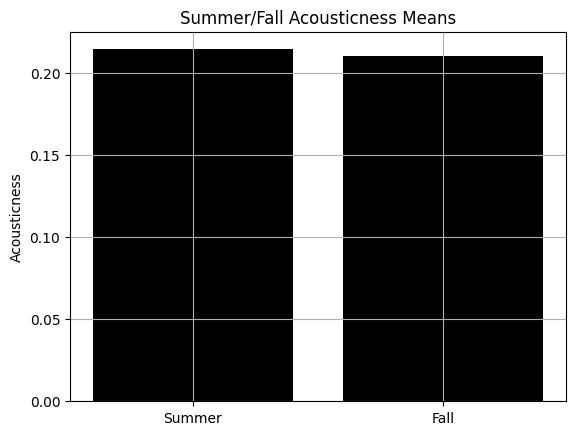

In [361]:
axAcousticness =  plt.bar(["Summer", "Fall"], [sumAcoMean_rap, fallAcoMean_rap], color = 'black')
plt.title("Summer/Fall Acousticness Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Acousticness")
plt.grid()

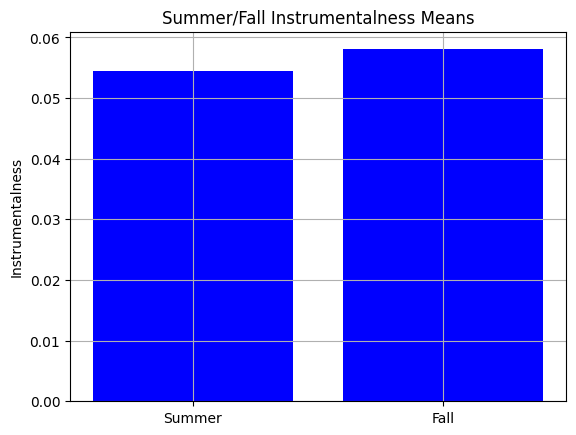

In [362]:
axInst = plt.bar(["Summer", "Fall"], [sumInstMean_pop, fallInstMean_pop], color = 'blue')
plt.title("Summer/Fall Instrumentalness Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Instrumentalness")
plt.grid()

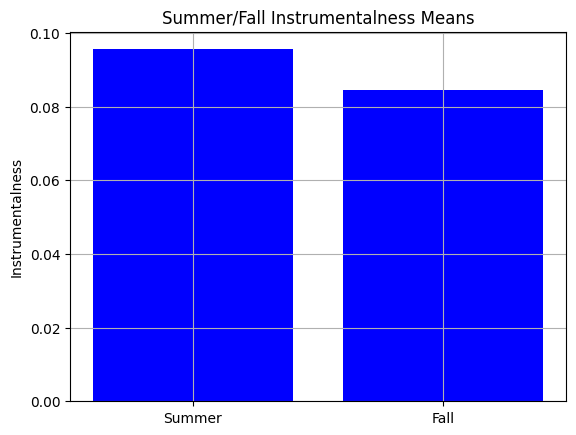

In [363]:
axInst = plt.bar(["Summer", "Fall"], [sumInstMean_rap, fallInstMean_rap], color = 'blue')
plt.title("Summer/Fall Instrumentalness Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Instrumentalness")
plt.grid()

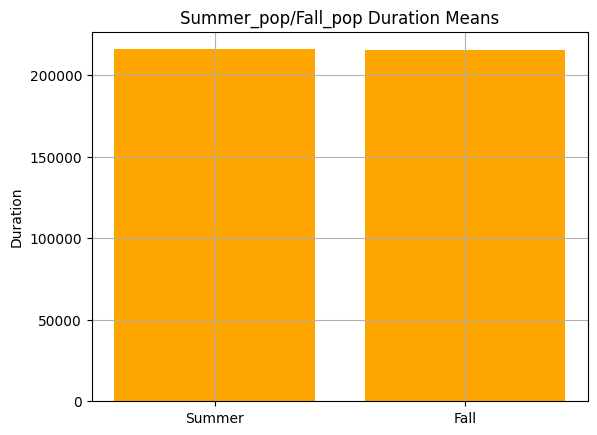

In [364]:
axDurr = plt.bar(["Summer", "Fall"], [sumDurMean_pop, fallDurMean_pop], color = 'orange')
plt.title("Summer_pop/Fall_pop Duration Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Duration")
plt.grid()

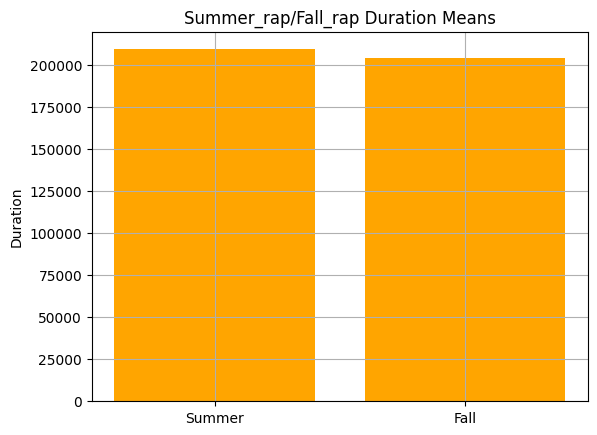

In [365]:
axDurr = plt.bar(["Summer", "Fall"], [sumDurMean_rap, fallDurMean_rap], color = 'orange')
plt.title("Summer_rap/Fall_rap Duration Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Duration")
plt.grid()

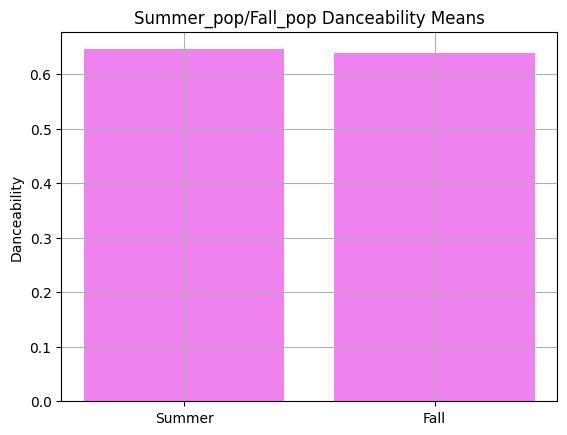

In [366]:
axDance = plt.bar(["Summer", "Fall"], [sumDanceMean_pop, fallDanceMean_pop], color = 'violet')
plt.title("Summer_pop/Fall_pop Danceability Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Danceability")
plt.grid()

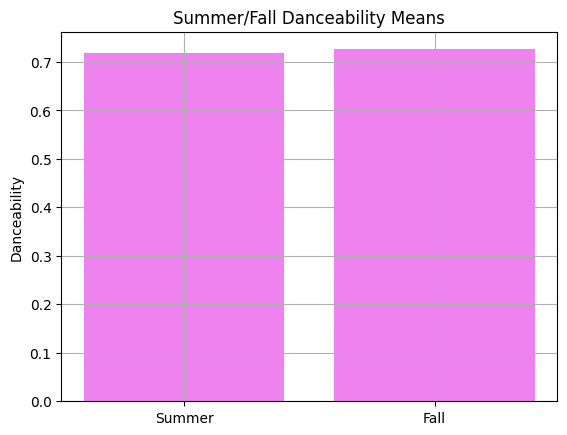

In [367]:
axDance = plt.bar(["Summer", "Fall"], [sumDanceMean_rap, fallDanceMean_rap], color = 'violet')
plt.title("Summer/Fall Danceability Means", fontdict=None, loc='center', pad=None)
plt.ylabel("Danceability")
plt.grid()

Most popular artists and mid popular artists analysis

In [368]:
most_populars= spotify_data.sort_values("track_popularity", ascending=False).head(10)
most_populars

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
20091,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.513,98.027,209438
1551,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,pop,...,6,-6.400,0,0.0924,0.6920,0.000104,0.1490,0.513,98.027,209438
23104,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
21468,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Contemporary Urban,6wyJ4bsjZaUKa9f6GeZlAO,r&b,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
20092,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
30202,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,6,-5.616,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636
23109,21jGcNKet2qwijlDFuPiPb,Circles,Post Malone,98,4g1ZRSobMefqF6nelkgibi,Hollywood's Bleeding,2019-09-06,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,215280
21384,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,New Hip Hop‏‏​​ ‍,5WNUX6jisX0NRlVDTm6RDd,r&b,...,10,-6.687,0,0.0559,0.1040,0.000000,0.7900,0.642,116.971,196653
23107,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,98,3nR9B40hYLKLcR0Eph3Goc,Memories,2019-09-20,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,11,-7.209,1,0.0546,0.8370,0.000000,0.0822,0.575,91.019,189486
11184,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,Trap Americana,7tkgK1tm9hYkWp7EFyOcAr,rap,...,10,-6.687,0,0.0559,0.1040,0.000000,0.7900,0.642,116.971,196653


In [369]:
mid = spotify_data.sort_values("track_popularity", ascending=False).iloc[16254:16264]
mid

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
22788,5uKJJBJ2JOV7szFXVP7owi,Falando Dela,Mc Maha,46,7AVUX7QvJQYDGumv4kdO2N,Falando Dela,2019-12-20,Brisa Pop,37i9dQZF1DX2vsux22VuNL,r&b,...,7,-11.581,1,0.2040,0.34400,0.000002,0.1600,0.5790,99.993,165850
30089,1caTqvWIUlkpY122g17GIm,Back Around,90 Miles,46,0cRfGtLNnI2MUmzu13uavk,Back Around,2018-08-26,Pop Hits 2000-2019,6mtYuOxzl58vSGnEDtZ9uB,edm,...,0,-7.688,0,0.0513,0.02130,0.000485,0.0809,0.1710,120.288,185000
11498,5nYZAg64b6sEpukTSuuSUZ,Daffodil Lament,The Cranberries,46,5GugLrmYMl5VRoe2zNgLGp,No Need To Argue,1994-10-03,The Cranberries Best Of,4E3K9oQgvLcKEz0wgBBXxD,rock,...,7,-11.818,0,0.0335,0.03640,0.124000,0.0825,0.0623,174.859,368027
11497,4zEvxRDaKDoFlHxK7Hy0wg,Sunday,The Cranberries,46,0AP5O47kJWlaKVnnybKvQI,"Everybody Else Is Doing It, So Why Can't We?",1993-03-01,The Cranberries Best Of,4E3K9oQgvLcKEz0wgBBXxD,rock,...,0,-13.103,1,0.0335,0.06140,0.000020,0.1260,0.1660,108.875,211067
11495,3N6V8ppRNlbAhqwFzlGgHP,Everything I Said,The Cranberries,46,5GugLrmYMl5VRoe2zNgLGp,No Need To Argue,1994-10-03,The Cranberries Best Of,4E3K9oQgvLcKEz0wgBBXxD,rock,...,3,-10.534,1,0.0264,0.00411,0.000219,0.1960,0.0737,97.304,232760
4082,0O8z1t1M41aeVAUi7scRvb,Gravity,Ralph,46,3vr0HWlxu3gDJx1QjbSIF7,Gravity,2019-07-03,The Sound of Indie Poptimism,7nHgmv7uyIA1KHj6qTttjH,pop,...,0,-4.054,0,0.0392,0.36600,0.000005,0.1110,0.7650,117.947,203095
4501,1HH9T6jsitwm9Cvs9jUeTf,Take It or Leave It,Great Good Fine Ok,46,6LxFWRPqoL446CkxQyL7sQ,III,2017-01-05,Indie Poptimism,1pZWCY50kMUhshcESknir8,pop,...,6,-3.830,1,0.0555,0.16200,0.000000,0.0718,0.9310,148.024,183468
4077,6H4IrhaJFaoXrSuQQKfzpD,Little Games - St. Lucia Remix,The Colourist,46,7dBKp63ECjAFL7q4FmEvWR,Inversions,2013-10-28,The Sound of Indie Poptimism,7nHgmv7uyIA1KHj6qTttjH,pop,...,7,-8.901,0,0.1040,0.00293,0.228000,0.1120,0.5710,110.541,273400
21332,0kFd1WEnWLODAzxux0bhQK,"Siempre Me Llama (feat. Farruko, Maldy & Yaviah)",Opi the Hit Machine,46,7KrTNcZTeGYcK5nUbVuj42,"Siempre Me Llama (feat. Farruko, Maldy & Yaviah)",2016-04-30,Los Cangri,2hTs6GuPwhmg4ApNqxWXLE,latin,...,1,-7.541,1,0.0664,0.04980,0.000000,0.2980,0.9080,169.975,250742
10350,2UXd7o203nuQXQiZRbYCQp,Hole in the Earth,AWAY,46,3miwIB4ZzCuGmupnhAIheH,Hole in the Earth,2019-08-15,Trap Nation,0NCspsyf0OS4BsPgGhkQXM,rap,...,11,-4.103,0,0.1630,0.12200,0.002140,0.3030,0.5230,149.940,256012


(0.0, 100.0)

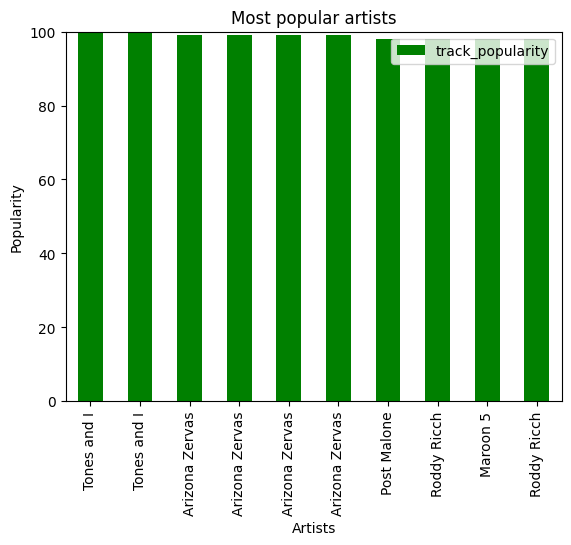

In [370]:
most_populars = spotify_data.sort_values("track_popularity", ascending=False).head(10).plot.bar(x="track_artist",y="track_popularity", color = "green")
most_populars.set_xlabel("Artists")
most_populars.set_ylabel("Popularity")
most_populars.set_title("Most popular artists")
plt.ylim(0,100)

(0.0, 100.0)

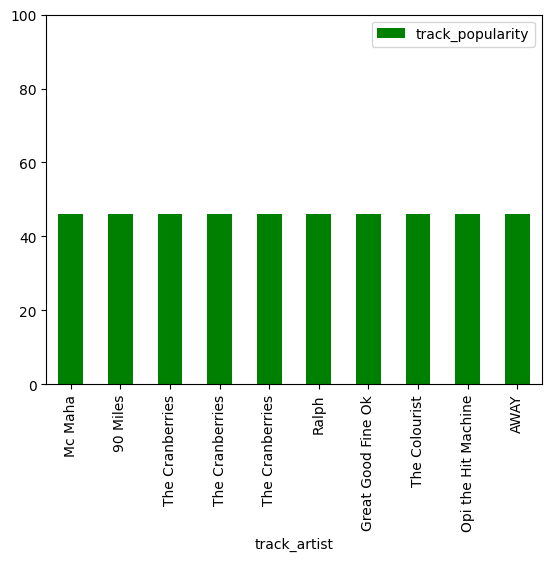

In [371]:
mid.plot.bar(x="track_artist",y="track_popularity", color = "green")
plt.ylim(0,100)

In [372]:
spotify_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


Text(0.5, 1.0, 'Change of Acousticness Over the Years')

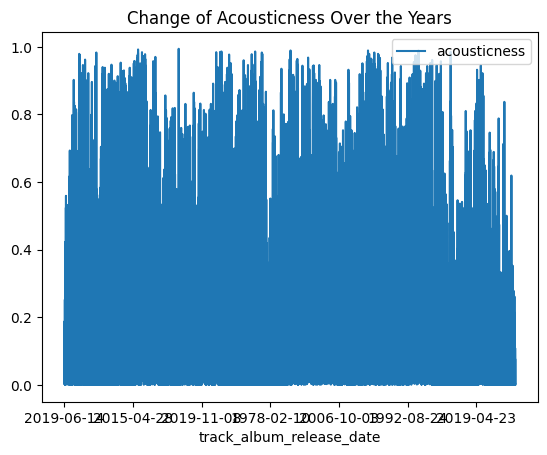

In [373]:
axAcousticness = spotify_data.plot(x = "track_album_release_date", y = "acousticness", )
axAcousticness.set_title("Change of Acousticness Over the Years")

Text(0.5, 1.0, 'Change of Loudness Over the Years')

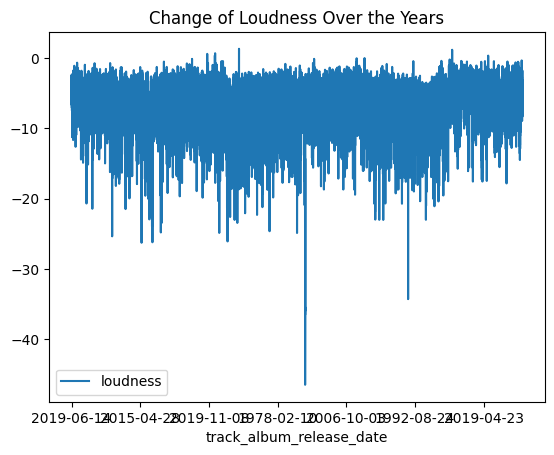

In [374]:
axLoudness = spotify_data.plot(x = "track_album_release_date", y = "loudness")
axLoudness.set_title("Change of Loudness Over the Years")

Text(0.5, 1.0, 'Change of Energy Over the Years')

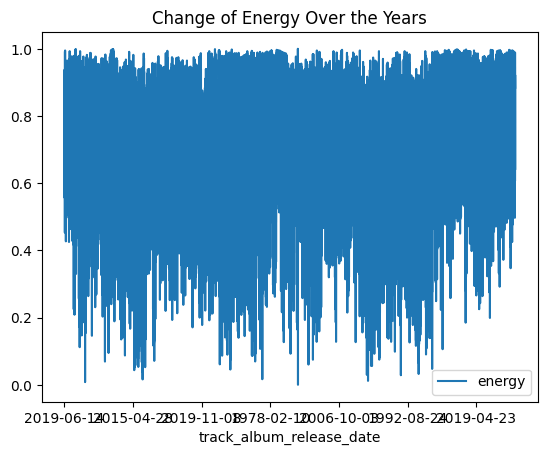

In [375]:

axEnergy = spotify_data.plot(x = "track_album_release_date", y = "energy")
axEnergy.set_title("Change of Energy Over the Years")

Text(0.5, 1.0, 'Change of Tempo Over the Years')

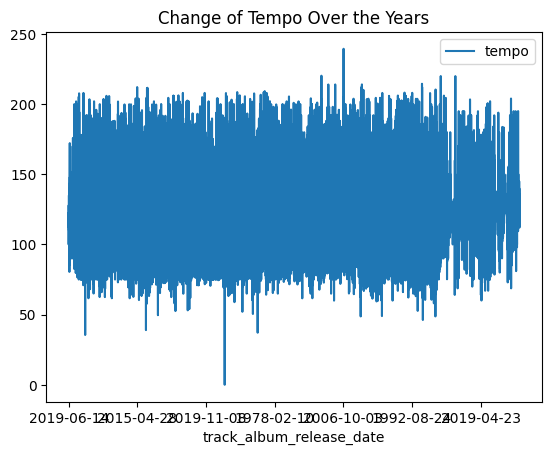

In [376]:
axTempo = spotify_data.plot(x = "track_album_release_date", y = "tempo")
axTempo.set_title("Change of Tempo Over the Years")

Text(0.5, 1.0, 'Change of Instrumentalness Over the Years')

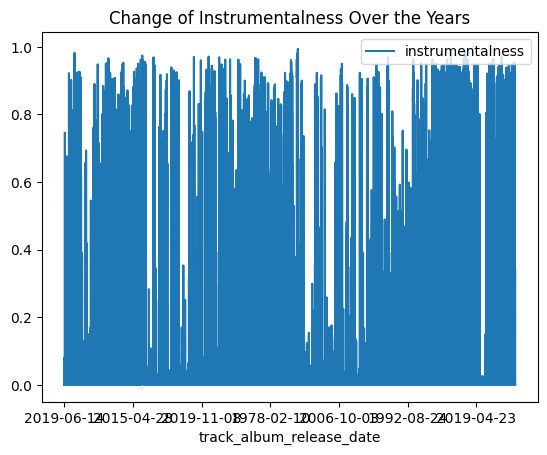

In [377]:
axInstrumentalness = spotify_data.plot(x = "track_album_release_date", y = "instrumentalness", )
axInstrumentalness.set_title("Change of Instrumentalness Over the Years")

Text(0.5, 1.0, 'Change of Danceability Over the Years')

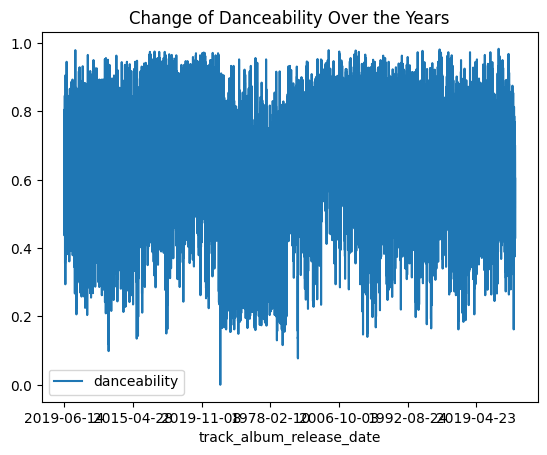

In [378]:
axDanceability = spotify_data.plot(x = "track_album_release_date", y = "danceability", )
axDanceability.set_title("Change of Danceability Over the Years")

Text(0.5, 1.0, 'Change of Speechiness Over the Years')

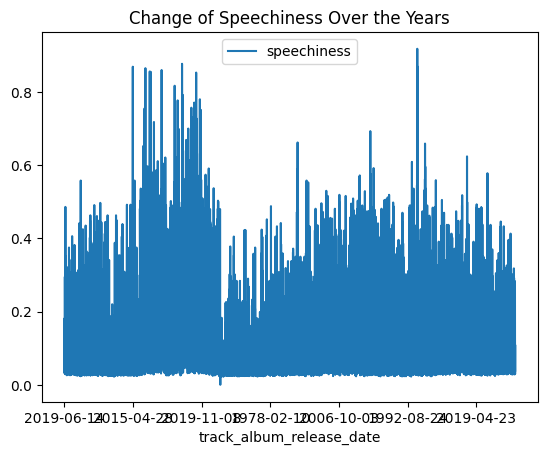

In [379]:
axSpeechiness = spotify_data.plot(x = "track_album_release_date", y = "speechiness", )
axSpeechiness.set_title("Change of Speechiness Over the Years")

CORREALATION OF THE DATA


In [380]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
spotify_data["encoded_track_name"] = le.fit_transform(spotify_data["track_name"])
spotify_data["encoded_track_artist"] = le.fit_transform(spotify_data["track_artist"])
spotify_data["encoded_date"]= le.fit_transform(spotify_data["track_album_release_date"])

In [381]:
corr_mat_artist_song=spotify_data[['encoded_track_artist','encoded_track_name']].corr()
print(corr_mat_artist_song)


                      encoded_track_artist  encoded_track_name
encoded_track_artist              1.000000            0.024794
encoded_track_name                0.024794            1.000000


<Axes: >

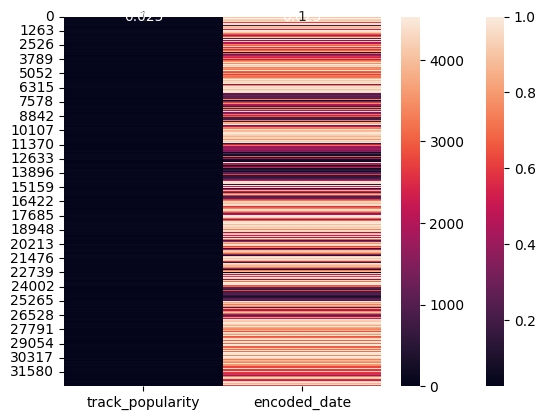

In [382]:
import seaborn as sns
sns.heatmap(corr_mat_artist_song,annot=True)
corr_mat_date_popu=spotify_data[['track_popularity','encoded_date']]
sns.heatmap(corr_mat_date_popu)

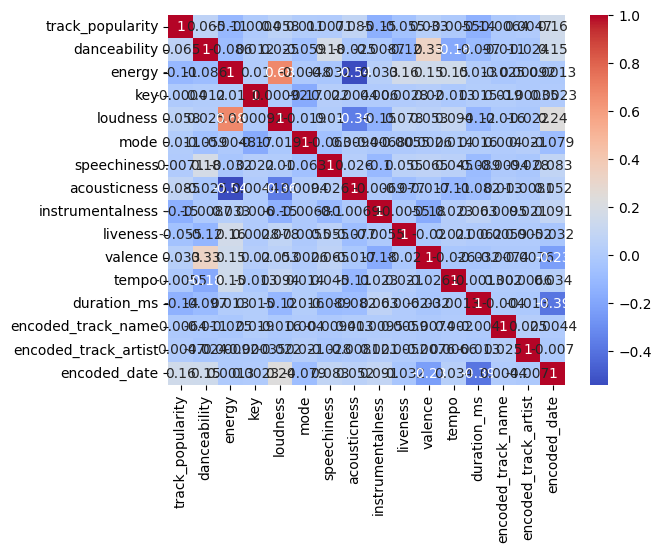

In [383]:
import matplotlib.pyplot as plt
corr_matrix = spotify_data.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

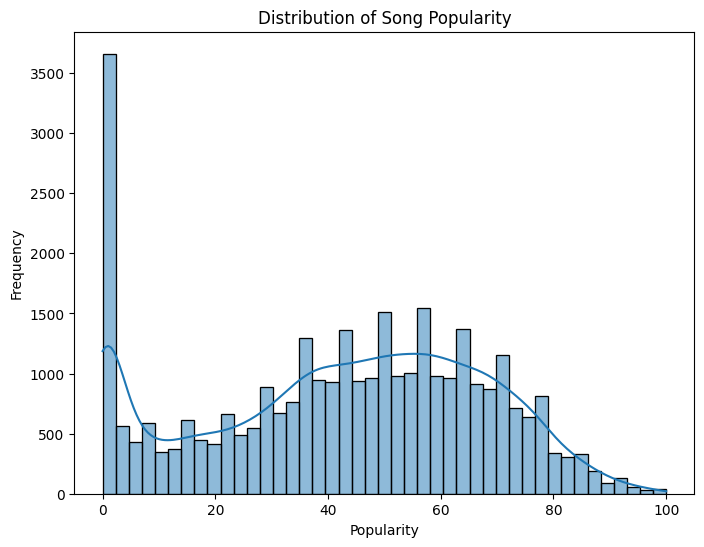

In [384]:
plt.figure(figsize=(8, 6))
sns.histplot(spotify_data['track_popularity'], kde=True)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Song Popularity')
plt.show()

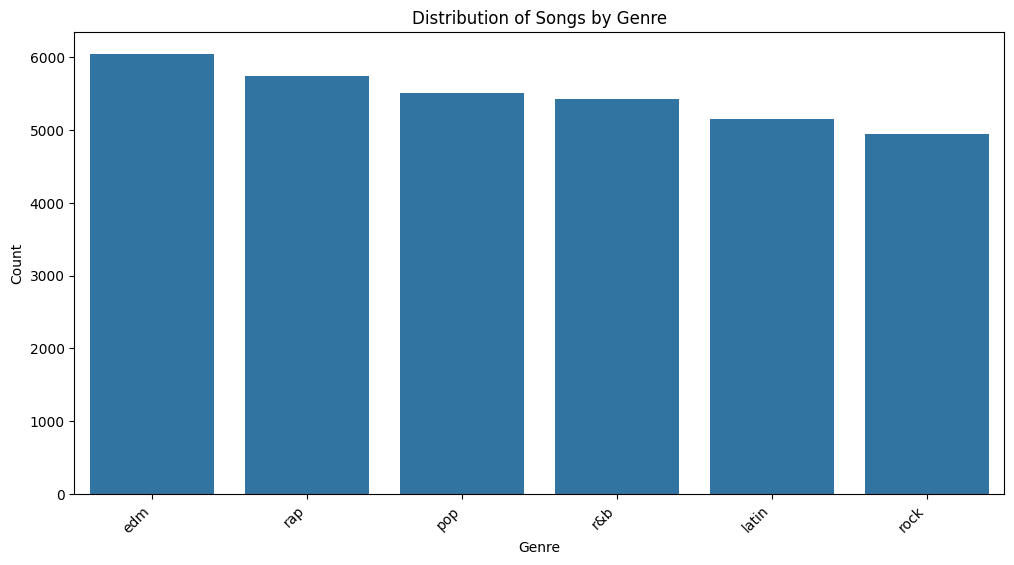

In [385]:
plt.figure(figsize=(12, 6))
sns.countplot(data=spotify_data, x='playlist_genre', order=spotify_data['playlist_genre'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Songs by Genre')
plt.show()

Text(0.5, 1.0, 'Correlation Between Change of Tempo and Loudness of Tracks Over Time')

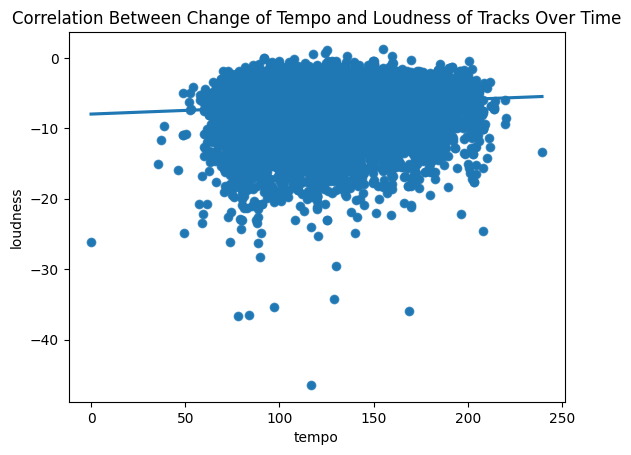

In [386]:
axCorr_Pop_TempoLoudness = spotify_data.plot.scatter(x = "tempo", y = "loudness")
sns.regplot(x = spotify_data["tempo"], y =spotify_data["loudness"], ci = None)
axCorr_Pop_TempoLoudness.set_title("Correlation Between Change of Tempo and Loudness of Tracks Over Time")


In [387]:

popular_song = spotify_data.sort_values("track_popularity", ascending=False).head(100)
least_song = spotify_data.sort_values("track_popularity", ascending=False).tail(100)


In [388]:
popular_song

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,encoded_track_name,encoded_track_artist,encoded_date
20091,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,0.0924,0.6920,0.000104,0.1490,0.5130,98.027,209438,4346,9664,4434
1551,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,pop,...,0.0924,0.6920,0.000104,0.1490,0.5130,98.027,209438,4346,9664,4434
23104,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,0.1480,0.0522,0.000000,0.4600,0.4570,116.735,163636,15781,638,4427
21468,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Contemporary Urban,6wyJ4bsjZaUKa9f6GeZlAO,r&b,...,0.1480,0.0522,0.000000,0.4600,0.4570,116.735,163636,15781,638,4427
20092,696DnlkuDOXcMAnKlTgXXK,ROXANNE,Arizona Zervas,99,6HJDrXs0hpebaRFKA1sF90,ROXANNE,2019-10-10,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,0.1480,0.0522,0.000000,0.4600,0.4570,116.735,163636,15781,638,4427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,3yOlyBJuViE2YSGn3nVE1K,My Oh My (feat. DaBaby),Camila Cabello,94,3Vsbl0diFGw8HNSjG8ue9m,Romance,2019-12-06,The Sound of Post-Teen Pop,10FCW9lj0NdeoYI5VVvVtY,pop,...,0.0296,0.0180,0.000013,0.0887,0.3830,105.046,170746,13203,1510,4484
19703,2tnVG71enUj33Ic2nFN6kZ,Ride It,Regard,94,4zOhjJfe0dwqsNdDYk622E,Ride It,2019-07-26,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,0.0874,0.1770,0.000064,0.1060,0.8840,117.948,157606,16186,7782,4354
6209,3eekarcy7kvN4yt5ZFzltW,HIGHEST IN THE ROOM,Travis Scott,94,2uDTi1PlpSpvAv7IRAoAEU,HIGHEST IN THE ROOM,2019-10-04,Hip-Hop Favourites,37i9dQZF1DX48TTZL62Yht,rap,...,0.0317,0.0546,0.000006,0.2100,0.0605,76.469,175721,7782,9726,4421
1310,2tnVG71enUj33Ic2nFN6kZ,Ride It,Regard,94,4zOhjJfe0dwqsNdDYk622E,Ride It,2019-07-26,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,0.0874,0.1770,0.000064,0.1060,0.8840,117.948,157606,16186,7782,4354


In [389]:
least_song

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,encoded_track_name,encoded_track_artist,encoded_date
19409,3mRC75ORY0GOABiqe1uZIg,Sexy Robotica,Don Omar,0,495r96T3NFoV3kM71pIcfx,iDon,2009-01-01,REGGAETON VIEJO,31hG19URdBvLEpQWKFYfdD,latin,...,0.0334,0.000443,0.000006,0.4490,0.561,112.011,233987,17108,2598,1919
11447,0EelMuZQ6bXJ2eLVPZUIxy,Swear,CASIOPEA,0,5XCOTqG63V60nS82PmqMBe,Asian Dreamer,2010-08-10,City Pop 1985 シティーポップ,3j2osvmecEao5nmo9jZ5df,rock,...,0.0454,0.604000,0.213000,0.0960,0.537,89.975,299627,18801,1427,2152
19406,2xAXL9sumTKMz47H5FN3qB,Te Siento,Wisin & Yandel,0,68mxRf4BxRz37GTKOSOw6r,Caribe 2010,2010-06-15,REGGAETON VIEJO,31hG19URdBvLEpQWKFYfdD,latin,...,0.0431,0.015800,0.000000,0.3830,0.432,109.948,257573,19188,10173,2131
19405,2x6X7MBtVqiv1GnLNnSm8e,Me Estas Tentando - Remix,Wisin & Yandel,0,0L2nzsL1AxdxkjIZxPlj2E,La Revolucion (Deluxe),2009-01-01,REGGAETON VIEJO,31hG19URdBvLEpQWKFYfdD,latin,...,0.0484,0.117000,0.000005,0.3110,0.805,116.018,264307,12409,10173,1919
11446,32Te40UQyEMvCrVlw19d7q,Twilight Solitude,CASIOPEA,0,5XCOTqG63V60nS82PmqMBe,Asian Dreamer,2010-08-10,City Pop 1985 シティーポップ,3j2osvmecEao5nmo9jZ5df,rock,...,0.0368,0.986000,0.899000,0.0725,0.141,119.573,264227,20745,1427,2152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19460,4HCsKNye8SYImpwXnurwmN,Prrrum - Remix,Cosculluela,0,4lAJ5MS5BlXfyC03rii98I,The Ones,2015-09-25,REGGAETON VIEJO,31hG19URdBvLEpQWKFYfdD,latin,...,0.2910,0.167000,0.000000,0.0721,0.727,90.034,253600,15538,1978,3203
11652,1TO1KYnFeSUqyRWuprjmZz,Echoes,Camel,0,17OeQWykxZnGWKDWNW5ofz,Breathless,1978-01-01,Progressive Rock / Metal - Rock /Metal Progre...,7GhTpb4eOp6403Bmgqz3db,rock,...,0.0309,0.010700,0.023200,0.0999,0.436,153.479,440267,5531,1505,257
11647,3suGVjo7xyvFbK0WHbDlUA,Lua Lua Lua - Live,Miguel Rios,0,5fstCqs5NpIlF42VhPNv23,Rock & Rios (Remastered),2005-01-01,Rock and Rios,2gpKfzXEi8QWvgBNPDPk5R,rock,...,0.1010,0.025600,0.000253,0.9670,0.508,95.009,196320,11923,6363,1484
19457,4PslQxk22ZmgBrUHmDfy7n,Bailarina,J Alvarez,0,2VP0irbKxiDWd76WpCUtFu,Lo Que No Puede Faltar En Tu Colección,2014-10-17,REGGAETON VIEJO,31hG19URdBvLEpQWKFYfdD,latin,...,0.0384,0.777000,0.000010,0.1410,0.739,89.820,227000,1712,4171,2951


<ipython-input-390-368a9c2f91ce>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(popular_song['danceability'], shade=True, label="danceability", ax=ax[2], color="c")
<ipython-input-390-368a9c2f91ce>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(least_song['danceability'], shade=True, label="danceability", ax=ax[2], color="y")


Text(0.5, 1.0, 'Comparison with KDE')

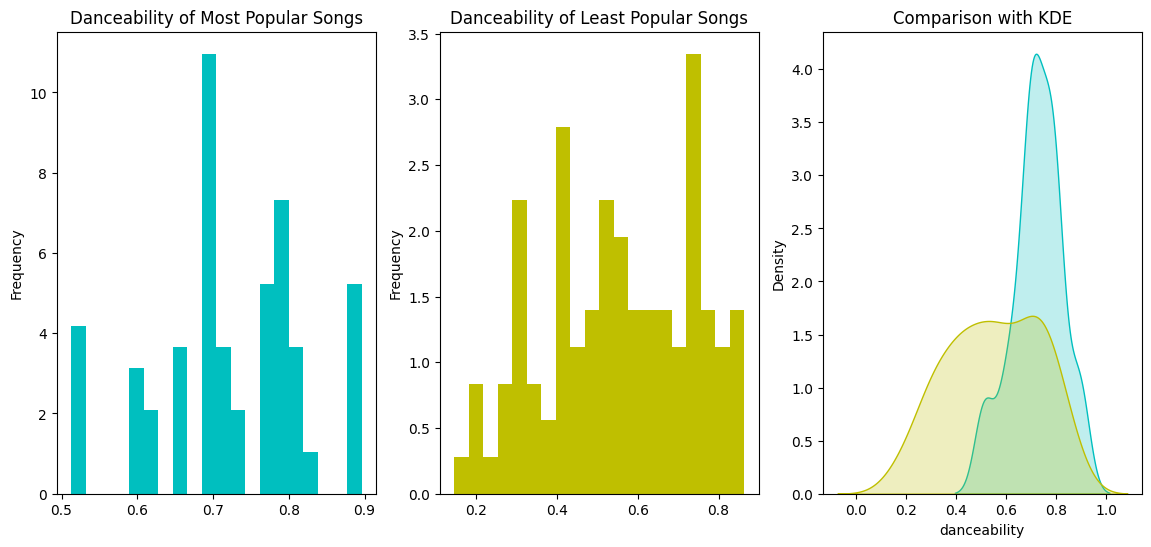

In [390]:
fig, ax = plt.subplots(1,3, figsize=(14,6))

popular_song['danceability'].plot(kind="hist", ax=ax[0], bins = 20, label = "danceability", color = "c", density=True)
ax[0].set_title("Danceability of Most Popular Songs")

least_song['danceability'].plot(kind="hist", ax=ax[1], bins = 20, label = "danceability", color = "y", density=True)
ax[1].set_title("Danceability of Least Popular Songs")

sns.kdeplot(popular_song['danceability'], shade=True, label="danceability", ax=ax[2], color="c")
sns.kdeplot(least_song['danceability'], shade=True, label="danceability", ax=ax[2], color="y")
ax[2].set_title("Comparison with KDE")



songs having the high danceability are most popular

<ipython-input-391-c6fc72753d1d>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(popular_song['liveness'], shade=True, label="liveness", ax=ax[2], color="C5")
<ipython-input-391-c6fc72753d1d>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(least_song['liveness'], shade=True, label="liveness", ax=ax[2], color="C3")


Text(0.5, 1.0, 'Comparison with KDE')

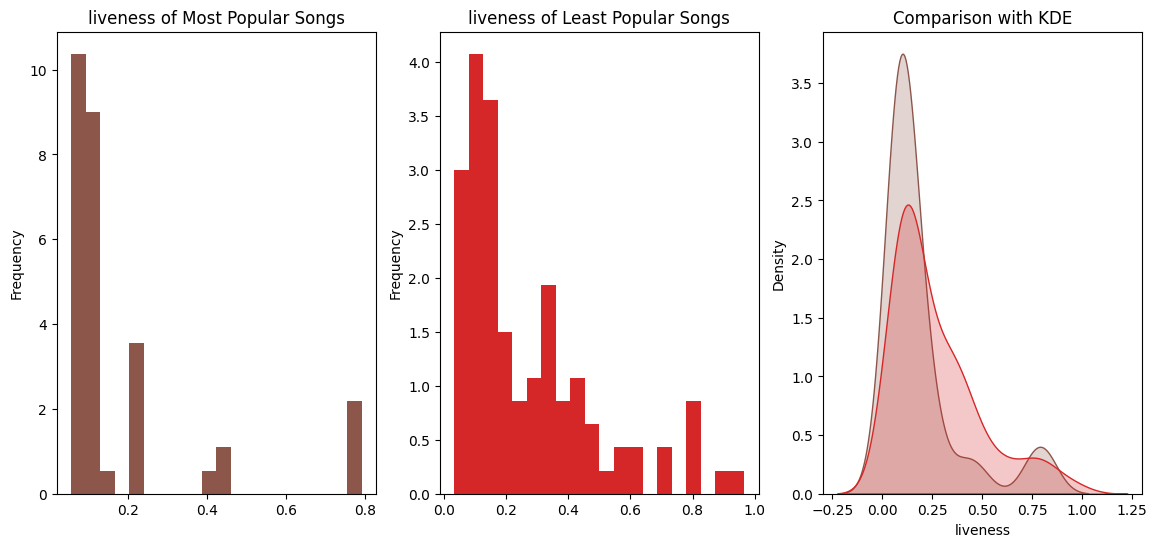

In [391]:
fig, ax = plt.subplots(1,3, figsize=(14,6))

popular_song['liveness'].plot(kind="hist", ax=ax[0], bins = 20, label = "liveness", color = "C5", density=True)
ax[0].set_title("liveness of Most Popular Songs")

least_song['liveness'].plot(kind="hist", ax=ax[1], bins = 20, label = "liveness", color = "C3", density=True)
ax[1].set_title("liveness of Least Popular Songs")

sns.kdeplot(popular_song['liveness'], shade=True, label="liveness", ax=ax[2], color="C5")
sns.kdeplot(least_song['liveness'], shade=True, label="liveness", ax=ax[2], color="C3")
ax[2].set_title("Comparison with KDE")



songs having the least popularity are high in liveness

<ipython-input-392-08741faa7658>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(popular_song['acousticness'], shade=True, label="acousticness", ax=ax[2], color="C5")
<ipython-input-392-08741faa7658>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(least_song['acousticness'], shade=True, label="acousticness", ax=ax[2], color="C3")


Text(0.5, 1.0, 'Comparison with KDE')

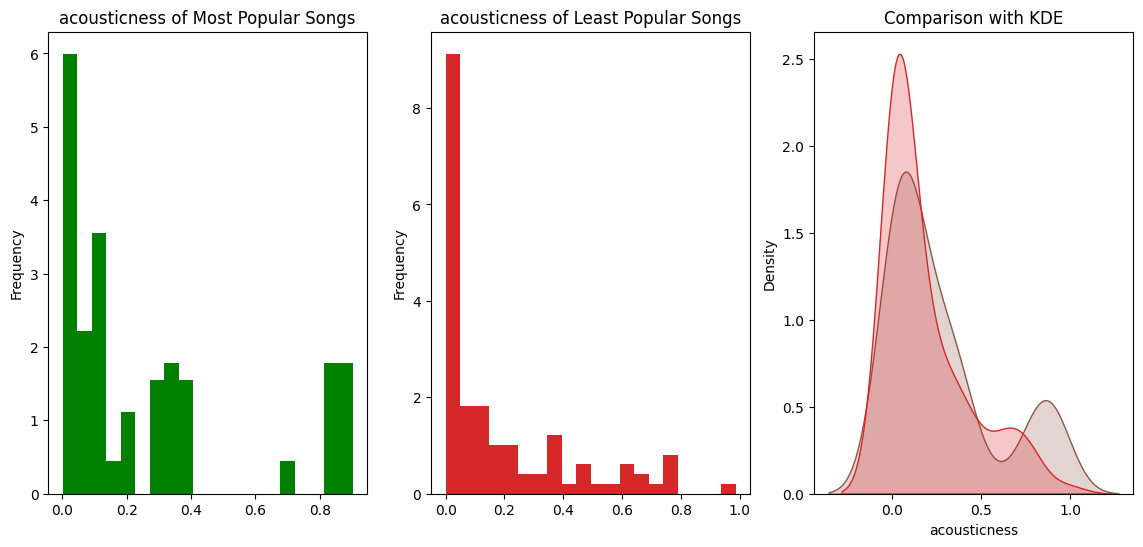

In [392]:
fig, ax = plt.subplots(1,3, figsize=(14,6))

popular_song['acousticness'].plot(kind="hist", ax=ax[0], bins = 20, label = "acousticness", color = "green", density=True)
ax[0].set_title("acousticness of Most Popular Songs")

least_song['acousticness'].plot(kind="hist", ax=ax[1], bins = 20, label = "acousticness", color = "C3", density=True)
ax[1].set_title("acousticness of Least Popular Songs")

sns.kdeplot(popular_song['acousticness'], shade=True, label="acousticness", ax=ax[2], color="C5")
sns.kdeplot(least_song['acousticness'], shade=True, label="acousticness", ax=ax[2], color="C3")
ax[2].set_title("Comparison with KDE")



songs having high acousticness are least in popularity

<ipython-input-393-b76d3a0cc337>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(popular_song['valence'], shade=True, label="valence", ax=ax[2], color="C5")
<ipython-input-393-b76d3a0cc337>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(least_song['valence'], shade=True, label="valence", ax=ax[2], color="C3")


Text(0.5, 1.0, 'Comparison with KDE')

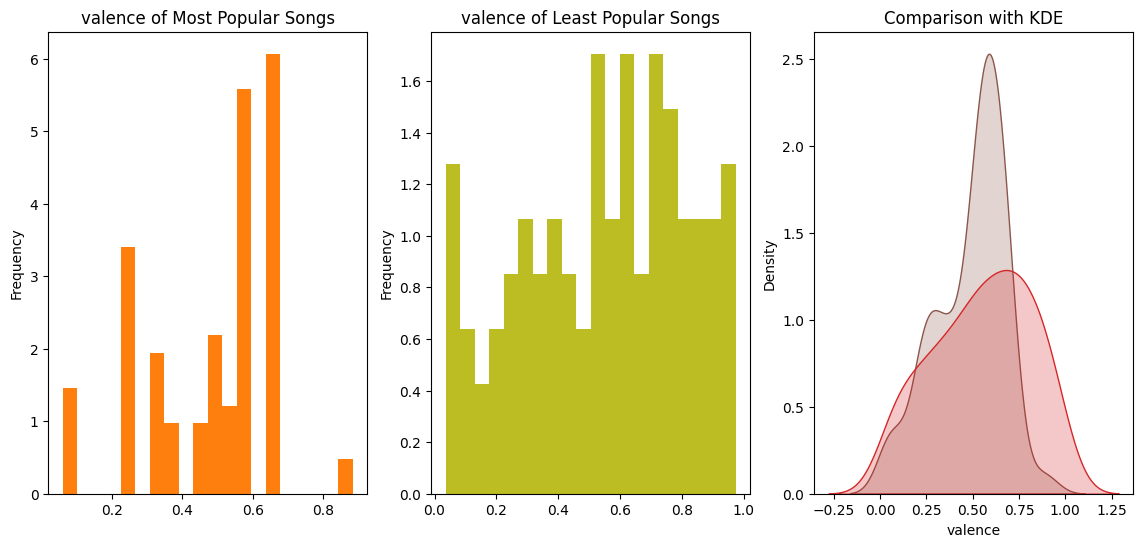

In [393]:
fig, ax = plt.subplots(1,3, figsize=(14,6))

popular_song['valence'].plot(kind="hist", ax=ax[0], bins = 20, label = "valence", color = "C1", density=True)
ax[0].set_title("valence of Most Popular Songs")

least_song['valence'].plot(kind="hist", ax=ax[1], bins = 20, label = "valence", color = "C8", density=True)
ax[1].set_title("valence of Least Popular Songs")

sns.kdeplot(popular_song['valence'], shade=True, label="valence", ax=ax[2], color="C5")
sns.kdeplot(least_song['valence'], shade=True, label="valence", ax=ax[2], color="C3")
ax[2].set_title("Comparison with KDE")



songs having high valence are more popular

<ipython-input-394-e364801b67cc>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(popular_song['energy'], shade=True, label="energy", ax=ax[2], color="C10")
<ipython-input-394-e364801b67cc>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(least_song['energy'], shade=True, label="energy", ax=ax[2], color="C3")


Text(0.5, 1.0, 'Comparison with KDE')

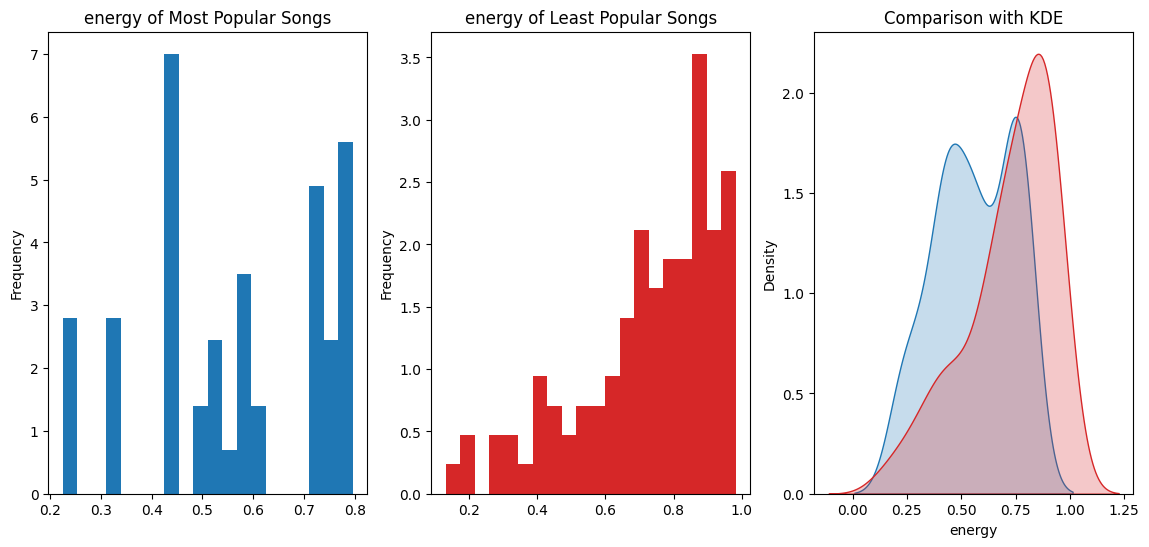

In [394]:
fig, ax = plt.subplots(1,3, figsize=(14,6))

popular_song['energy'].plot(kind="hist", ax=ax[0], bins = 20, label = "energy", color = "C10", density=True)
ax[0].set_title("energy of Most Popular Songs")

least_song['energy'].plot(kind="hist", ax=ax[1], bins = 20, label = "valence", color = "C3", density=True)
ax[1].set_title("energy of Least Popular Songs")

sns.kdeplot(popular_song['energy'], shade=True, label="energy", ax=ax[2], color="C10")
sns.kdeplot(least_song['energy'], shade=True, label="energy", ax=ax[2], color="C3")
ax[2].set_title("Comparison with KDE")



songs having high energy are most popular


##CLUSTERING USING K-MEANS ALGORITHM

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
spotify_data["genre"] = le.fit_transform(spotify_data["playlist_genre"])
spotify_data["popularity"] = le.fit_transform(spotify_data["track_popularity"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 ... 0 0 2]
[1 1 1 ... 0 0 2]


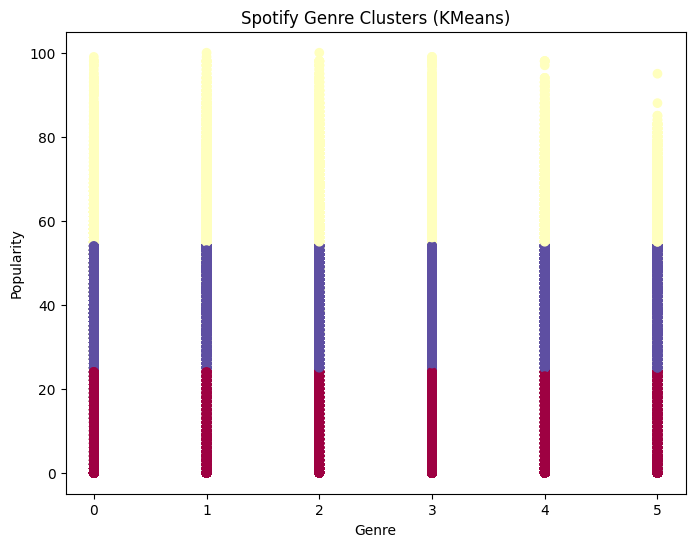

In [526]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
kmeans = KMeans(n_clusters=3)
genre_features = ['genre', 'popularity']
genre_data = spotify_data[genre_features]
try:
    kmeans.fit(genre_data)
except AttributeError:
    if not hasattr(kmeans, 'cluster_centers_') or not hasattr(kmeans, 'labels_'):
        kmeans.fit(genre_data)
cluster_labels = kmeans.labels_
print(cluster_labels)
cluster_labels = kmeans.labels_
print(cluster_labels)
danceability = spotify_data['genre']
energy = spotify_data['popularity']

plt.figure(figsize=(8, 6))
plt.scatter(danceability, energy, c=cluster_labels, cmap='Spectral')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Spotify Genre Clusters (KMeans)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 1 ... 2 0 2]
[0 0 1 ... 2 0 2]


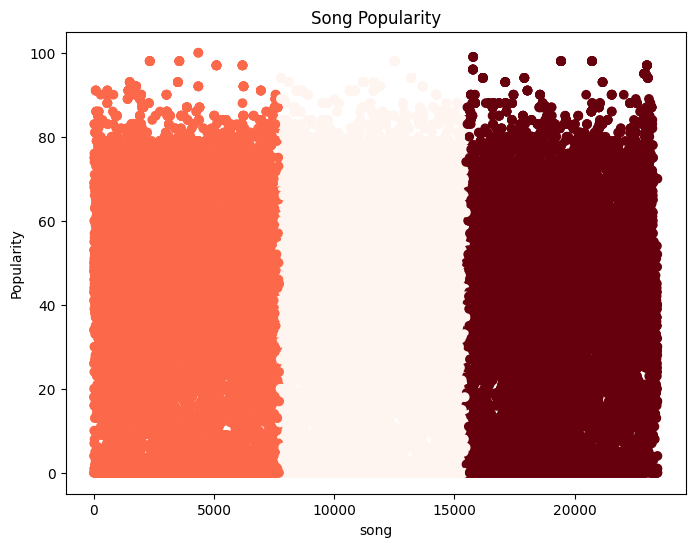

In [527]:
spotify_data["song"] = le.fit_transform(spotify_data["track_name"])
spotify_data["popularity"] = le.fit_transform(spotify_data["track_popularity"])

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
kmeans = KMeans(n_clusters=3)
genre_features = ['song', 'popularity']
genre_data = spotify_data[genre_features]
try:
    kmeans.fit(genre_data)
except AttributeError:
    if not hasattr(kmeans, 'cluster_centers_') or not hasattr(kmeans, 'labels_'):
        kmeans.fit(genre_data)
cluster_labels = kmeans.labels_
print(cluster_labels)
cluster_labels = kmeans.labels_
print(cluster_labels)
danceability = spotify_data['song']
energy = spotify_data['popularity']
plt.figure(figsize=(8, 6))
plt.scatter(danceability, energy, c=cluster_labels, cmap='Reds')
plt.xlabel('song')
plt.ylabel('Popularity')
plt.title('Song Popularity')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


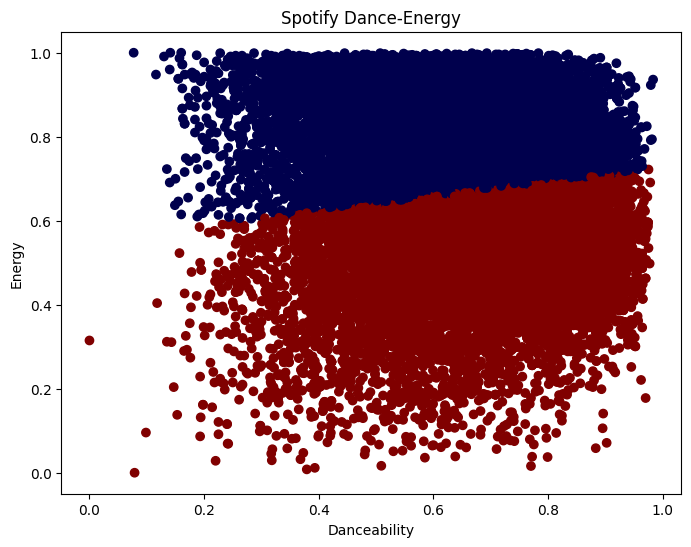

In [528]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
kmeans = KMeans(n_clusters=2)
genre_features = ['danceability', 'energy']
genre_data = spotify_data[genre_features]
try:
    kmeans.fit(genre_data)
except AttributeError:
    if not hasattr(kmeans, 'cluster_centers_') or not hasattr(kmeans, 'labels_'):
        kmeans.fit(genre_data)
cluster_labels = kmeans.labels_
print(cluster_labels)
cluster_labels = kmeans.labels_
print(cluster_labels)
danceability = spotify_data['danceability']
energy = spotify_data['energy']

plt.figure(figsize=(8, 6))
plt.scatter(danceability, energy, c=cluster_labels, cmap='seismic')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Spotify Dance-Energy')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


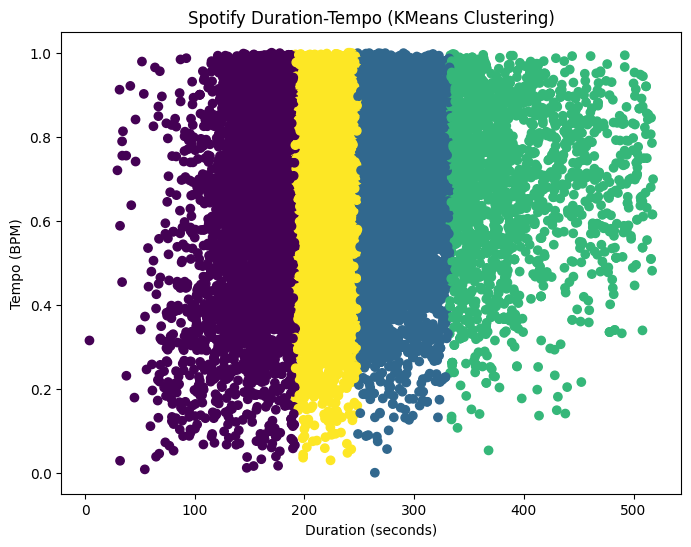

In [529]:
genre_features = ['duration_ms', 'tempo']
genre_data = spotify_data[genre_features]
try:
  kmeans = KMeans(n_clusters=4)
  kmeans.fit(genre_data)
except AttributeError:
  if not hasattr(kmeans, 'cluster_centers_') or not hasattr(kmeans, 'labels_'):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(genre_data)
    kmeans.fit(scaled_data)

cluster_labels = kmeans.labels_
danceability = spotify_data['duration_ms'] / 1000
plt.figure(figsize=(8, 6))
plt.scatter(danceability, energy, c=cluster_labels, cmap='viridis')
plt.xlabel('Duration (seconds)')
plt.ylabel('Tempo (BPM)')
plt.title('Spotify Duration-Tempo (KMeans Clustering)')
plt.grid(False)  # Set grid to False to remove lines
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 4 0 ... 0 3 2]
[0 4 0 ... 0 3 2]


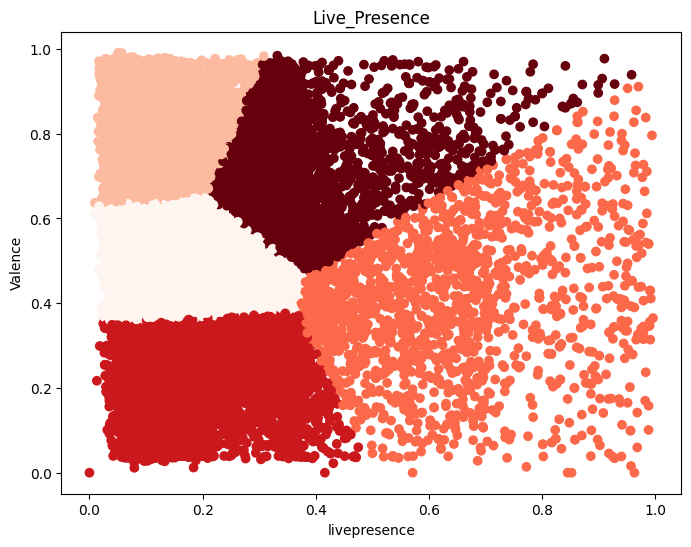

In [530]:
kmeans = KMeans(n_clusters=5)
genre_features = ['liveness', 'valence']
genre_data = spotify_data[genre_features]
try:
    kmeans.fit(genre_data)
except AttributeError:
    if not hasattr(kmeans, 'cluster_centers_') or not hasattr(kmeans, 'labels_'):
        kmeans.fit(genre_data)
cluster_labels = kmeans.labels_
print(cluster_labels)
cluster_labels = kmeans.labels_
print(cluster_labels)
danceability = spotify_data['liveness']
energy = spotify_data['valence']
plt.figure(figsize=(8, 6))
plt.scatter(danceability, energy, c=cluster_labels, cmap='Reds')
plt.xlabel('livepresence')
plt.ylabel('Valence')
plt.title('Live_Presence')
plt.show()

In [534]:
spotify_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,liveness,valence,tempo,duration_ms,encoded_track_name,encoded_track_artist,encoded_date,genre,popularity,song
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0653,0.518,122.036,194754,8898,2782,4314,2,66,8898
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.3570,0.693,99.972,162600,12520,6084,4491,2,67,12520
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.1100,0.613,124.008,176616,924,10416,4334,2,70,924
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.2040,0.277,121.956,169093,3020,9215,4347,2,60,3020
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0833,0.725,123.976,189052,17910,5402,4219,2,69,17910


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


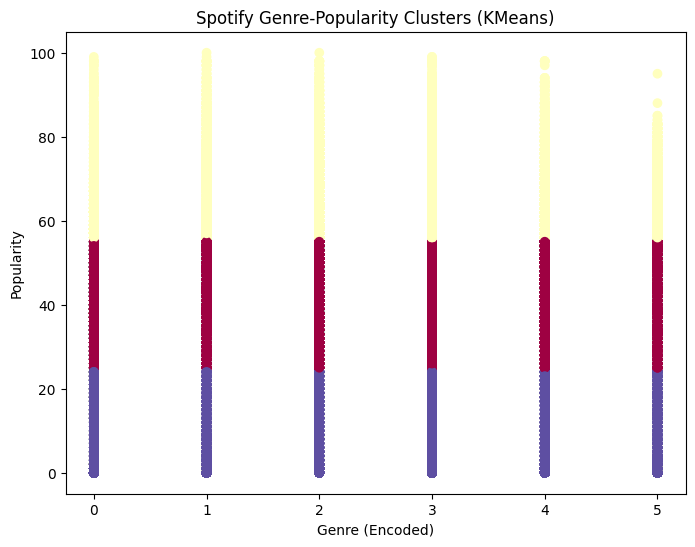

In [535]:
genre_features = ['genre', 'popularity']
genre_data = spotify_data[genre_features]
try:
  kmeans = KMeans(n_clusters=3)
  kmeans.fit(genre_data)
except AttributeError:
  kmeans.fit(genre_data)
cluster_labels = kmeans.labels_
plt.figure(figsize=(8, 6))
plt.scatter(x =genre_data['genre'], y =genre_data['popularity'], c=cluster_labels, cmap='Spectral')
plt.xlabel('Genre (Encoded)')
plt.ylabel('Popularity')
plt.title('Spotify Genre-Popularity Clusters (KMeans)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


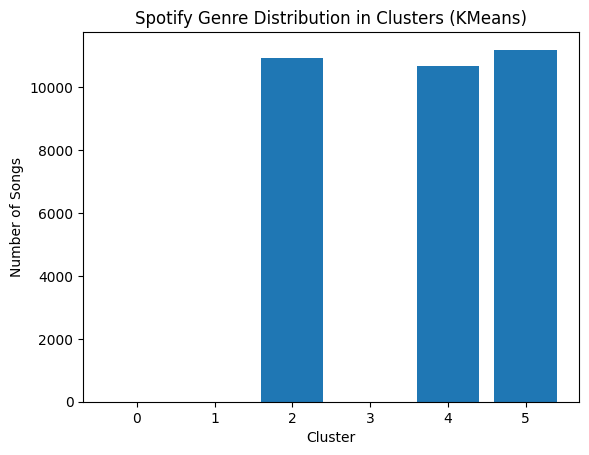

In [536]:
genre_data = spotify_data['genre']
features = ['genre', 'danceability', 'energy']
feature_data = spotify_data[features]
try:
  kmeans = KMeans(n_clusters=3)
  kmeans.fit(feature_data.values)
except AttributeError:
  kmeans.fit(feature_data.values)
cluster_labels = kmeans.labels_
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(feature_data.values)
unique_genres = genre_data.unique()
cluster_genre_counts = [
    (genre, (cluster_labels == i).sum()) for i, genre in enumerate(unique_genres)
]
cluster_genres, genre_counts = zip(*cluster_genre_counts)
plt.bar(cluster_genres, genre_counts)
plt.xlabel('Cluster')
plt.ylabel('Number of Songs')
plt.title('Spotify Genre Distribution in Clusters (KMeans)')
plt.show()

##PREDICTION OF SONG POPULARITY USING MACHINE LEARNING MODELS

In [395]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

##PREPROCESSING THE DATA FOR LINEAR REGRESSION

In [396]:
spotify_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,encoded_track_name,encoded_track_artist,encoded_date
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,8898,2782,4314
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,12520,6084,4491
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,924,10416,4334
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,3020,9215,4347
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,17910,5402,4219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,3567,5725,2829
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,3642,9102,2579
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,18844,8746,2824
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,14439,6140,2759


In [397]:
spotify_data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'encoded_track_name', 'encoded_track_artist',
       'encoded_date'],
      dtype='object')

In [426]:
X = spotify_data.drop(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name','track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'encoded_track_name', 'encoded_track_artist',
       'encoded_date'], axis=1)
y = spotify_data['track_popularity']


In [427]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [428]:
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size= 0.20, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)


In [429]:
from sklearn.linear_model import LinearRegression
#train the model on the training set
ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression()

In [430]:
#predict the test set results
y_predict = ml.predict(X_test)
print(y_predict)

[42.57055054 43.29953614 29.241764   ... 39.55766545 44.56774517
 49.9532878 ]


In [431]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mse)

Text(0.5, 1.0, 'Actual vs. Predicted')

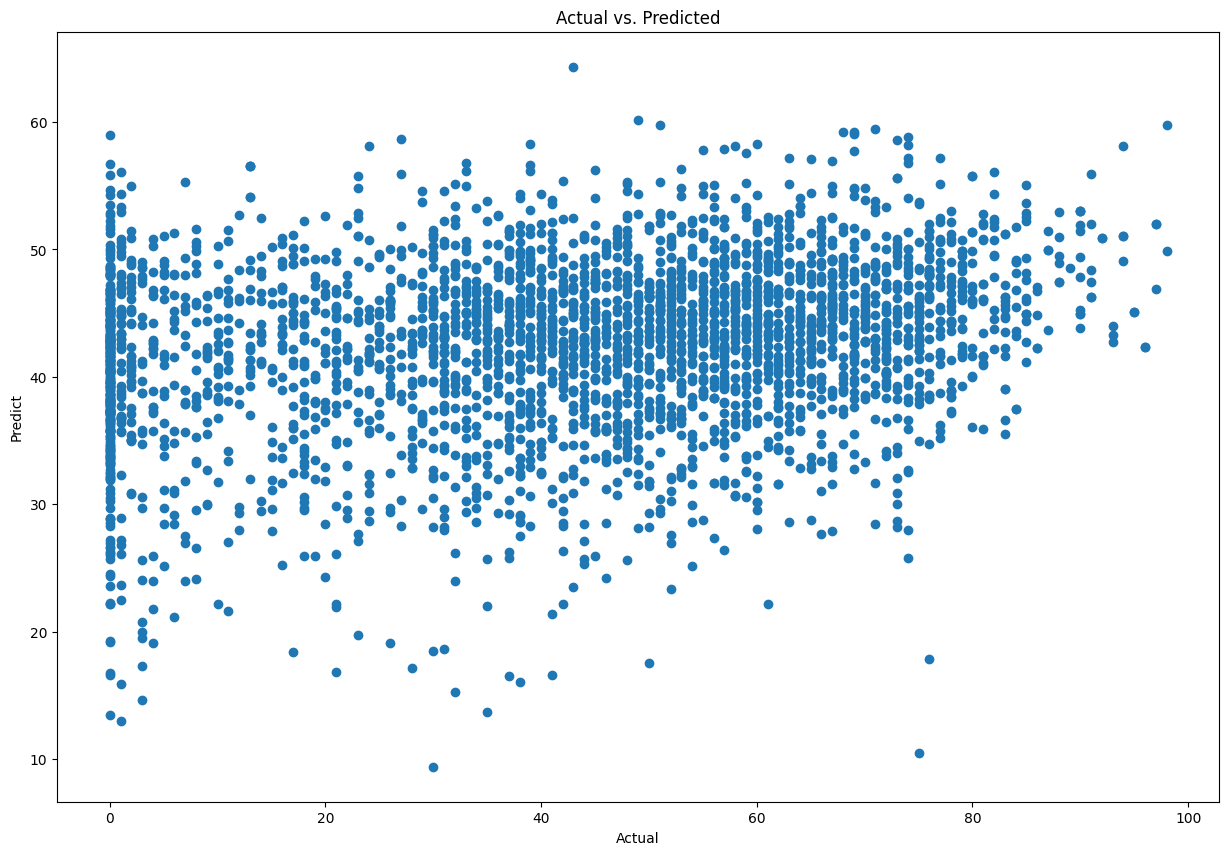

In [433]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_predict)
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.title('Actual vs. Predicted')

In [407]:
pred_y_df = pd.DataFrame({"Actual Value": y_test, "Predicted value": y_predict, "Difference": y_test-y_predict})
pred_y_df.head(3000)

,Actual Value,Predicted value,Difference
19574,1,42.570551,-41.570551
25019,16,43.299536,-27.299536
24899,37,29.241764,7.758236
23366,64,40.588277,23.411723
25112,0,38.119242,-38.119242
...,...,...,...
24193,44,25.686856,18.313144
26501,0,53.514524,-53.514524
25599,79,46.374262,32.625738
14729,52,39.966228,12.033772


In [435]:
tracksRFdf = spotify_data.drop(columns=['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', "track_album_release_date",
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'encoded_track_name', 'encoded_track_artist',
       'encoded_date'], axis=1)



In [436]:
cat_tracks = tracksRFdf.select_dtypes('O').columns
cat_tracks = np.append(cat_tracks, ['explicit', 'key', 'mode'])


tracksRFdf.select_dtypes(exclude='O').columns


Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [456]:
num_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


In [457]:
tracksRFdf.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [458]:
x = tracksRFdf
y = spotify_data['track_popularity']


In [459]:
y.head()

0    66
1    67
2    70
3    60
4    69
Name: track_popularity, dtype: int64

In [460]:
y.value_counts(normalize=True)

track_popularity
0      0.082186
1      0.017516
57     0.016480
60     0.015657
51     0.015657
         ...   
97     0.000670
95     0.000457
96     0.000213
99     0.000122
100    0.000061
Name: proportion, Length: 101, dtype: float64

In [461]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)


In [462]:
ohe = OneHotEncoder(sparse = False)
x_train_cat = ohe.fit_transform(x_train[[ 'key', 'mode']])
x_train[:5]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
21563,0.664,0.831,2,-4.472,0,0.0435,0.11100,0.000001,0.0596,0.696,125.058,198006
30187,0.720,0.560,8,-8.928,1,0.0527,0.00781,0.000004,0.0744,0.324,103.067,244806
6580,0.795,0.779,11,-5.413,1,0.1770,0.10900,0.000014,0.0836,0.783,95.045,211787
20908,0.726,0.952,8,-1.483,0,0.2170,0.03240,0.000000,0.1910,0.655,97.963,250421
20150,0.834,0.934,2,-2.898,1,0.1730,0.06510,0.000795,0.0523,0.592,105.021,153835


In [463]:
x_test_cat = ohe.fit_transform(x_test[[ 'key', 'mode']])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [464]:
ss = StandardScaler()
x_train_num = ss.fit_transform(x_train[num_cols])
x_train_num[:5]

x_test_num = ss.fit_transform(x_test[num_cols])

In [466]:
x_train_out = pd.DataFrame(np.concatenate([x_train_cat, x_train_num, x_train[[ 'key', 'mode']]], axis=1))
x_test_out = pd.DataFrame(np.concatenate([x_test_cat, x_test_num, x_test[['key', 'mode']]], axis=1))
x_train_out = x_train_out.iloc[:round(len(tracksRFdf)/2)] #we devided the training dataframe into two since processing the whole dataframe takes so much time
y_train = y_train.iloc[:round(len(tracksRFdf)/2)]

In [467]:
x_train_out.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.463869,0.733668,-0.375478,-0.847275,0.750583,-0.626937,0.152759,0.791512,2.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.317580,-0.765826,-0.375465,-0.751214,-0.740663,-0.536104,-0.664133,-0.804593,8.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.233759,0.445942,-0.375420,-0.691500,0.435668,0.691131,-0.962123,1.164794,11.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.411337,1.403183,-0.375484,0.005593,1.750883,1.086058,-0.853729,0.615597,8.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.201420,1.303586,-0.371917,-0.894657,1.277339,0.651639,-0.591548,0.345289,2.0,1.0


In [483]:
knn_params = {
    "n_neighbors": range(2, 19)
}

In [484]:
knn_gs = GridSearchCV(KNeighborsRegressor(), param_grid = knn_params)


knn_gs.fit(x_train_out, y_train)



GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(2, 19)})

In [485]:
print(knn_gs.best_params_)
print(knn_gs.best_score_)
print(knn_gs.best_index_)

{'n_neighbors': 18}
0.040576946550491134
16


In [486]:
print("AFTER tuning Training w/bin set score: {:.4f}". format(knn_gs.score(x_train_out, y_train)))
print("AFTER tuning Test w/bin set score: {:.4f}". format(knn_gs.score(x_test_out, y_test)))


AFTER tuning Training w/bin set score: 0.1473
AFTER tuning Test w/bin set score: 0.0553


In [487]:
pd.DataFrame(knn_gs.cv_results_)



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013278,0.001844,0.723077,0.099989,2,{'n_neighbors': 2},-0.218173,-0.245505,-0.225693,-0.251536,-0.206211,-0.229424,0.016893,17
1,0.006567,0.002825,0.387914,0.031137,3,{'n_neighbors': 3},-0.118883,-0.131015,-0.111626,-0.152391,-0.109966,-0.124776,0.015675,16
2,0.011470,0.005874,0.435530,0.057027,4,{'n_neighbors': 4},-0.087737,-0.078477,-0.069940,-0.081255,-0.075918,-0.078665,0.005878,15
3,0.005009,0.000320,0.258175,0.011525,5,{'n_neighbors': 5},-0.066257,-0.046475,-0.055214,-0.047871,-0.054605,-0.054084,0.007018,14
4,0.005251,0.000836,0.251654,0.006308,6,{'n_neighbors': 6},-0.047277,-0.019721,-0.037479,-0.026865,-0.032505,-0.032769,0.009358,13
5,0.004933,0.000213,0.258245,0.007511,7,{'n_neighbors': 7},-0.027929,-0.002456,-0.014910,-0.018561,-0.027056,-0.018182,0.009294,12
6,0.004972,0.000330,0.258625,0.010013,8,{'n_neighbors': 8},-0.013962,0.004683,-0.004598,0.003317,-0.012839,-0.004680,0.007802,11
7,0.006913,0.003219,0.394585,0.099187,9,{'n_neighbors': 9},-0.003099,0.009084,0.007315,0.007003,-0.003349,0.003391,0.005448,10
8,0.011162,0.003876,0.454245,0.045472,10,{'n_neighbors': 10},-0.002087,0.021105,0.013227,0.011402,0.011700,0.011070,0.007469,9
9,0.005016,0.000492,0.283093,0.036335,11,{'n_neighbors': 11},0.009951,0.033730,0.022778,0.011390,0.021298,0.019829,0.008636,8


In [488]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = knn_gs.predict(x_test_out)
print("Predicted labels: \n", y_pred)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("MSE (mean squared error):  {}".format(mse))
print("MAE (mean absolute error): {}".format(mae))
print("RMSE (root mean squared error):  {}".format(rmse))

Predicted labels: 
 [51.33333333 41.77777778 48.5        ... 45.61111111 58.83333333
 28.        ]
MSE (mean squared error):  579.9409467214193
MAE (mean absolute error): 19.856254442075336
RMSE (root mean squared error):  24.081963099411546


##SONG RECOMMENDATION SYSTEM

In [504]:
def euclidean_distance(row1, row2): # finds the euclidean distance between two points
  distance = 0.0
  for i in range(len(row1)-1):
    distance += (row1[i] - row2[i])**2
  return math.sqrt(distance)

In [505]:
def get_neighbors(train, test_row, num_neighbors): # finds the nearest neighbors to the given point in the data frame
	distances = list()
	for i in range(len(train)):
		dist = euclidean_distance(test_row, train.iloc[i])
		distances.append((train.iloc[i], dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

In [507]:
spotify_data.columns


Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'encoded_track_name', 'encoded_track_artist',
       'encoded_date'],
      dtype='object')

In [524]:

x = input("Please enter the row numbers seperated by a comma (','): " ) # take the index of the wanted songs in the data frame

s = x.split(",")
songs = []

for ss in s:
  songs.append(ss.strip())
# wanted songs appended to the songs list seperately
wantedSongs = []
for song in songs:
  song = int(song)
  if len(spotify_data) > song: # if song is not out of bounds
    track = spotify_data.iloc[song]
    songIndex = track.name # save the song index to the wanted songs
    wantedSongs.append(songIndex)
    tracksdf_genreFilter = spotify_data[spotify_data['playlist_genre'].apply(lambda x: spotify_data.iloc[songIndex]['playlist_genre'] in x)] # filter out the songs that are not in the same genre as the wanted song
    if len(tracksdf_genreFilter) > 1: # if there is other songs in the same genre
      newTracksdf = tracksdf_genreFilter.drop(columns=['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre','encoded_track_name', 'encoded_track_artist',
       'encoded_date']) # drop the categorical columns from both data frames
      newTracksdf_song = spotify_data.drop(columns=['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre','encoded_track_name', 'encoded_track_artist',
       'encoded_date'])
      neighbors = get_neighbors(newTracksdf, newTracksdf_song.iloc[songIndex], 2) # find the closest 2 neighbors of the wanted songs, the firs one is the songs itself the second song
                                             # is the first closest song to the wanted song
      print("Recommended song based on '" + track['track_artist'] + " - " + track['playlist_name'] + "' is '" + spotify_data.iloc[neighbors[1].name]['track_artist'] + " - " + spotify_data.iloc[neighbors[1].name]['playlist_name'] + "'.")
        # print out the which song is reccommended according to which song
    else: # if there is no any other songs in the same genre
      print("There is not another song in the same genre, recommendation will not take genre account.")
      newTracksdf = tracksdf_genreFilter.drop(columns=['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre','encoded_track_name', 'encoded_track_artist',
       'encoded_date']) # drop the categorical columns from both data frames
      newTracksdf_song = spotify_data.drop(columns=['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre','encoded_track_name', 'encoded_track_artist',
       'encoded_date'])
      neighbors = get_neighbors(newTracksdf, newTracksdf_song.iloc[songIndex], 2)
      print("Recommended song based on '" + track['track_artist'] + " - " + track['playlist_name'] + "' is '" + spotify_data.iloc[neighbors[1].name]['track_artist'] + " - " + spotify_data.iloc[neighbors[1].name]['playlist_name'] + "'.")
        # print out the which song is reccommended according to which song
  else: # ifsong is out of bounds
    print("There is not such song in the data frame.")
featureSums = { # a library which saves the sum of all features in wanted songs list
    'acousticness': 0.0,
    'danceability': 0.0,
    'duration_ms': 0.0,
    'energy': 0.0,
    'instrumentalness': 0.0,
    'liveness': 0.0,
    'loudness': 0.0,
    'track_popularity': 0.0,
    'speechiness': 0.0,
    'tempo': 0.0,
    'valence': 0.0}
newTracksdf = spotify_data.drop(columns=['track_id', 'track_name', 'track_artist',
       'track_album_id', 'track_album_name','track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre','encoded_track_name', 'encoded_track_artist',
       'encoded_date']) # drop the categorical columns from the data frame

explicitCount = 0
modeCount = 0
for wantedSong in wantedSongs: # for every song in wanted songs
                               # sum its feature with the same feature in the featureSums library
  featureSums['acousticness'] += newTracksdf.iloc[wantedSong]['acousticness']
  featureSums['danceability'] += newTracksdf.iloc[wantedSong]['danceability']
  featureSums['duration_ms'] += newTracksdf.iloc[wantedSong]['duration_ms']
  featureSums['energy'] += newTracksdf.iloc[wantedSong]['energy']
  featureSums['instrumentalness'] += newTracksdf.iloc[wantedSong]['instrumentalness']
  featureSums['liveness'] += newTracksdf.iloc[wantedSong]['liveness']
  featureSums['loudness'] += newTracksdf.iloc[wantedSong]['loudness']
  featureSums['track_popularity'] += newTracksdf.iloc[wantedSong]['track_popularity']
  featureSums['speechiness'] += newTracksdf.iloc[wantedSong]['speechiness']
  featureSums['tempo'] += newTracksdf.iloc[wantedSong]['tempo']
  featureSums['valence'] += newTracksdf.iloc[wantedSong]['valence']
  modeCount += newTracksdf.iloc[wantedSong]['mode']

newRow = { # a library which will save the mean of every feature as a row
    'acousticness': 0,
    'danceability': 0,
    'duration_ms': 0,
    'energy': 0,
    'explicit': 0,
    'instrumentalness': 0,
    'liveness': 0,
    'loudness': 0,
    'mode': 0,
    'track_popularity': 0,
    'speechiness': 0,
    'tempo': 0,
    'valence': 0.
}


if (modeCount/len(wantedSongs)) > 1/2:
  newRow['mode'] = 1

# save all means to the newRow
newRow['acousticness'] = featureSums['acousticness']/len(wantedSongs)
newRow['danceability'] = featureSums['danceability']/len(wantedSongs)
newRow['duration_ms'] = featureSums['duration_ms']/len(wantedSongs)
newRow['energy'] = featureSums['energy']/len(wantedSongs)
newRow['instrumentalness'] = featureSums['instrumentalness']/len(wantedSongs)
newRow['liveness'] = featureSums['liveness']/len(wantedSongs)
newRow['loudness'] = featureSums['loudness']/len(wantedSongs)
newRow['track_popularity'] = featureSums['track_popularity']/len(wantedSongs)
newRow['speechiness'] = featureSums['speechiness']/len(wantedSongs)
newRow['tempo'] = featureSums['tempo']/len(wantedSongs)
newRow['valence'] = featureSums['valence']/len(wantedSongs)
newRowData = {
    'acousticness': [newRow['acousticness']],
    'danceability': [newRow['danceability']],
    'duration_ms': [newRow['duration_ms']],
    'energy': [newRow['energy']],
    'instrumentalness': [newRow['instrumentalness']],
    'liveness': [newRow['liveness']],
    'loudness': [newRow['loudness']],
    'mode': [newRow['mode']],
    'popularity': [newRow['track_popularity']],
    'speechiness': [newRow['speechiness']],
    'tempo': [newRow['tempo']],
    'valence': [newRow['valence']]
}
# turn newRaw into a data frame
songdf = pd.DataFrame(newRowData)

neighbors = get_neighbors(newTracksdf, songdf.iloc[0], 2) # get the closest neighbor to the mean of all songs
print("Recommended song based on the mean of all songs is '" + spotify_data.iloc[neighbors[1].name]['track_artist'] + " - " + spotify_data.iloc[neighbors[1].name]['track_name'] + "'.")
# print out the which song is reccommended according to mean



Please enter the row numbers seperated by a comma (','): 6077,5041
Recommended song based on 'Youngbloodz - Hip-Hop Drive' is 'Youngbloodz - The Sound of Southern Hip Hop'.
Recommended song based on 'Bad Suns - indie poptimism' is 'Bad Suns - indie poptimism'.
Recommended song based on the mean of all songs is 'Agonoize - Staatsfeind'.
